# Databaset Used -- Used-cars-catalog
Optar por adquirir un modelo de auto usado suele ser una 
decisión muy compleja; existen múltiples factores que 
influencian la elección final del vehículo a adquirir.

El precio, antigüedad y cantidad de kilómetros recorridos, el 
tipo de combustible, así como también las preferencias 
individuales de los consumidores, son algunas de las variables 
a tener en cuenta.

Del mismo modo, aquellos consumidores que deseen poner 
en venta sus autos deberán tomar en consideración las 
mismas variables para determinar a qué precio de venta 
ofertarán. 

En el mercado secundario de compra/venta de autos usados 
se pueden encontrar infinidad de ofertas de precios para un 
mismo modelo de vehículo o con similares características.


Link: [Used-cars-catalog](https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog)


In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive

#drive.mount('/content/drive')
#df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset_cars/cars.csv')

#df=pd.read_csv("cars.csv")

#cargar el dataset hosteado en github
url='https://raw.githubusercontent.com/lobitaWarrior/Used_Car_DA_Course/main/Datasetcars.csv'
df = pd.read_csv(url)
df

manufacturer_name  model_name transmission   color  odometer_value  \
0                Subaru     Outback    automatic  silver          190000   
1                Subaru     Outback    automatic    blue          290000   
2                Subaru    Forester    automatic     red          402000   
3                Subaru     Impreza   mechanical    blue           10000   
4                Subaru      Legacy    automatic   black          280000   
...                 ...         ...          ...     ...             ...   
37674          Chrysler         300    automatic  silver          290000   
37675          Chrysler  PT Cruiser   mechanical    blue          321000   
37676          Chrysler         300    automatic    blue          777957   
37677          Chrysler  PT Cruiser   mechanical   black           20000   
37678          Chrysler     Voyager    automatic  silver          297729   

       year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0               2010    gasoline           False    gasoline              2.5   
1               2002    gasoline           False    gasoline              3.0   
2               2001    gasoline           False    gasoline              2.5   
3               1999    gasoline           False    gasoline              3.0   
4               2001    gasoline           False    gasoline              2.5   
...              ...         ...             ...         ...              ...   
37674           2000    gasoline           False    gasoline              3.5   
37675           2004      diesel           False      diesel              2.2   
37676           2000    gasoline           False    gasoline              3.5   
37677           2001    gasoline           False    gasoline              2.0   
37678           2000    gasoline           False    gasoline              2.4   

       ... feature_1  feature_2 feature_3 feature_4 feature_5  feature_6  \
0      ...      True       True      True     False      True      False   
1      ...      True      False     False      True      True      False   
2      ...      True      False     False     False     False      False   
3      ...     False      False     False     False     False      False   
4      ...      True      False      True      True     False      False   
...    ...       ...        ...       ...       ...       ...        ...   
37674  ...      True      False     False      True      True      False   
37675  ...      True      False     False      True      True      False   
37676  ...      True      False     False      True      True      False   
37677  ...      True      False     False     False     False      False   
37678  ...     False      False     False     False     False      False   

      feature_7  feature_8  feature_9  duration_listed  
0          True       True       True               16  
1         False      False       True               83  
2         False       True       True              151  
3         False      False      False               86  
4         False      False       True                7  
...         ...        ...        ...              ...  
37674     False       True       True              301  
37675     False       True       True              317  
37676     False       True       True              369  
37677     False      False       True              490  
37678     False      False       True              632  

[37679 rows x 30 columns]

In [3]:
df=df.rename(columns=lambda x: x.strip()) #sacamos los espacios del nombre de las columnas

# Data Wrangling

In [4]:
df.head()

manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4 feature_5  feature_6  \
0  ...      True       True      True     False      True      False   
1  ...      True      False     False      True      True      False   
2  ...      True      False     False     False     False      False   
3  ...     False      False     False     False     False      False   
4  ...      True      False      True      True     False      False   

  feature_7  feature_8  feature_9  duration_listed  
0      True       True       True               16  
1     False      False       True               83  
2     False       True       True              151  
3     False      False      False               86  
4     False      False       True                7  

[5 rows x 30 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37679 entries, 0 to 37678
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  37679 non-null  object 
 1   model_name         37679 non-null  object 
 2   transmission       37679 non-null  object 
 3   color              37679 non-null  object 
 4   odometer_value     37679 non-null  int64  
 5   year_produced      37679 non-null  int64  
 6   engine_fuel        37679 non-null  object 
 7   engine_has_gas     37679 non-null  bool   
 8   engine_type        37679 non-null  object 
 9   engine_capacity    37669 non-null  float64
 10  body_type          37679 non-null  object 
 11  has_warranty       37679 non-null  bool   
 12  state              37679 non-null  object 
 13  drivetrain         37679 non-null  object 
 14  price_usd          37679 non-null  object 
 15  is_exchangeable    37679 non-null  bool   
 16  location_region    376

**El Dataset Cars posee 37679 registros, no posee valores nulos y tiene 29 columnas.**

In [6]:
df.dtypes.value_counts() #tipos de columnas

bool       13
object     11
int64       5
float64     1
dtype: int64

In [7]:
df["engine_capacity"]=df["engine_capacity"].astype(str) #pasamos a categorica la variable que indica la capacidad del motor

In [8]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 31.8 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=68148d59ed3e8dee10c81ce8e090b27dbc7368a0be9dc138f40a68e014322688
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [9]:
#Traducimos las regiones de ruso a ingles, para eso sacamos los distintos valores de la columna "location_region" y 
#La primera vez las traducimos con google translate a mano haciendo el replace correspondiente.
#La segunda vez usamo la libreria googletrans para traducir automaticamente

from googletrans import Translator

translator=Translator()

for region in df["location_region"].unique():
  df["location_region"]=df["location_region"].str.replace(region,translator.translate(region,dest='en').text)

df["location_region"].unique()

#df["location_region"]=df["location_region"].str.replace("Гомельская обл.","Gomel Region")
#df["location_region"]=df["location_region"].str.replace("Брестская обл.","Brest Region")
#df["location_region"]=df["location_region"].str.replace("Могилевская обл.","Mogilev Region")
#df["location_region"]=df["location_region"].str.replace("Витебская обл.","Vitebks Region")
#df["location_region"]=df["location_region"].str.replace("Гродненская обл.","Grodno Region")
#df["location_region"]=df["location_region"].str.replace("Минская обл.","Minsk Region")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


array(['Minsk region', 'Gomel region', 'Brest region', 'Mogilev region',
       'Vitebsk region', 'Grodno region'], dtype=object)

In [10]:
def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #create a dataframe with especificas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]
  
  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

In [11]:
df_uni_stats = univariado_info(df)
df_uni_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Cantidad    Tipo  Missing  Unicos  Numeric           top  \
manufacturer_name     37679  object        0      50    False    Volkswagen   
model_name            37679  object        0    1037    False        Passat   
transmission          37679  object        0       2    False    mechanical   
color                 37679  object        0      12    False         black   
odometer_value        37679   int64        0    5952     True             -   
year_produced         37679   int64        0      49     True             -   
engine_fuel           37679  object        0       6    False      gasoline   
engine_has_gas        37679    bool        0       2     True         False   
engine_type           37679  object        0       3    False      gasoline   
engine_capacity       37679  object        0      61    False           2.0   
body_type             37679  object        0      12    False         sedan   
has_warranty          37679    bool        0       2     True         False   
state                 37679  object        0       3    False         owned   
drivetrain            37679  object        0       3    False         front   
price_usd             37679  object        0    2527    False        1,500    
is_exchangeable       37679    bool        0       2     True         False   
location_region       37679  object        0       6    False  Minsk region   
number_of_photos      37679   int64        0      60     True             -   
up_counter            37679   int64        0     377     True             -   
feature_0             37679    bool        0       2     True         False   
feature_1             37679    bool        0       2     True          True   
feature_2             37679    bool        0       2     True         False   
feature_3             37679    bool        0       2     True         False   
feature_4             37679    bool        0       2     True         False   
feature_5             37679    bool        0       2     True         False   
feature_6             37679    bool        0       2     True         False   
feature_7             37679    bool        0       2     True         False   
feature_8             37679    bool        0       2     True         False   
feature_9             37679    bool        0       2     True          True   
duration_listed       37679   int64        0     769     True             -   

                            mean            std     min       25%       50%  \
manufacturer_name              -              -       -         -         -   
model_name                     -              -       -         -         -   
transmission                   -              -       -         -         -   
color                          -              -       -         -         -   
odometer_value     251067.320417  134317.940084     0.0  160000.0  250000.0   
year_produced        2003.183073       7.717202  1960.0    1998.0    2003.0   
engine_fuel                    -              -       -         -         -   
engine_has_gas                 -              -       -         -         -   
engine_type                    -              -       -         -         -   
engine_capacity                -              -       -         -         -   
body_type                      -              -       -         -         -   
has_warranty                   -              -       -         -         -   
state                          -              -       -         -         -   
drivetrain                     -              -       -         -         -   
price_usd                      -              -       -         -         -   
is_exchangeable                -              -       -         -         -   
location_region                -              -       -         -         -   
number_of_photos        9.699992       6.099779     1.0       5.0       8.0   
up_counter             16.230102      42.891368     1.0       2.0   

# Analisis Univariado




In [12]:
import math

def sturges_intervals(data):
  #sturges rules to select bin
  k = 1 + 3.322 * math.log10(len(data))
  periodos = math.ceil(k)

  #generacion de intervalos en base al rango y periodo
  intervals = pd.interval_range(
      start=data.min(),
      end=data.max() + 1,
      periods=k,
      name="Intervalo",
      closed="left")
  
  #redondeo de los valores de corte
  inter = pd.IntervalIndex([
    pd.Interval( round(i.left,1), round(i.right,1), i.closed )
    for i in intervals])
  
  return inter, periodos


def freq_table(df, col, with_cuts=True):

  #seleccion de data
  data = df[col]

  #verificacion de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data) or not with_cuts:
    #generaion de tabla de frecuenca ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
  
  else:

    #generacion de dataframe con cortes
    freq_tab = pd.DataFrame(index=sturges_intervals(data)[0])
    freq_tab["FreqAbs"] = pd.cut(data, bins=freq_tab.index).value_counts()
    freq_tab["Marca"]  = freq_tab.index.mid

    freq_tab["LimInf"] = freq_tab.index.left
    freq_tab["LimSup"] = freq_tab.index.right

  
  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  #calculo de variable simultaneo
  
  freq_tab[['FAbsAcumulada', 'FRelAcumulada']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

In [13]:
!pip install sidetable
import sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Price

In [14]:
df.stb.freq(["price_usd"])

price_usd  count   percent  cumulative_count  cumulative_percent
0       1,500     611  1.621593               611            1.621593
1       3,500     560  1.486239              1171            3.107832
2       2,500     541  1.435813              1712            4.543645
3       2,000     534  1.417235              2246            5.960880
4       1,000     520  1.380079              2766            7.340959
...        ...    ...       ...               ...                 ...
2522    1,040       1  0.002654             37675           99.989384
2523    1,032       1  0.002654             37676           99.992038
2524    1,029       1  0.002654             37677           99.994692
2525    1,020       1  0.002654             37678           99.997346
2526    1,014       1  0.002654             37679          100.000000

[2527 rows x 5 columns]

In [15]:
if df["price_usd"].dtypes =='object':
  df["price_usd"]=df["price_usd"].str.replace('[A-Za-z]', '').str.replace(',', '').astype(float) #cambiamos el formato del precio para que sea tomado como número.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [16]:
df["price_usd"][:10]

0    10900.0
1     5000.0
2     2800.0
3     9999.0
4     2134.0
5    14700.0
6     3000.0
7     4500.0
8    12900.0
9     4200.0
Name: price_usd, dtype: float64

In [17]:
df["price_usd"].describe()

count    37679.000000
mean      6740.370127
std       6444.716439
min          1.000000
25%       2250.000000
50%       4900.000000
75%       9000.000000
max      50000.000000
Name: price_usd, dtype: float64

In [18]:
df["price_usd"].median()

4900.0

In [19]:
sturges_intervals(df["price_usd"])
pd.DataFrame(index=sturges_intervals(df['price_usd'])[0])

Empty DataFrame
Columns: []
Index: [[1.0, 3126.0), [3126.0, 6251.0), [6251.0, 9376.0), [9376.0, 12501.0), [12501.0, 15626.0), [15626.0, 18751.0), [18751.0, 21876.0), [21876.0, 25001.0), [25001.0, 28126.0), [28126.0, 31251.0), [31251.0, 34376.0), [34376.0, 37501.0), [37501.0, 40626.0), [40626.0, 43751.0), [43751.0, 46876.0), [46876.0, 50001.0)]

In [20]:
#ejemplo sencillo de tabla frecuencia agrupada 
Price = pd.DataFrame(pd.cut(df['price_usd'], bins=16).value_counts())

Price['FreqRel'] = Price['price_usd'] / Price['price_usd'].sum()
#calculo de variable simultaneo
  
Price[['FAbsAcumulada', 'FRelAcumulada']] = Price[['price_usd','FreqRel']].cumsum()

Price.rename(columns={'price_usd':'price_usd_count'},
               inplace=True)
Price

price_usd_count   FreqRel  FAbsAcumulada  \
(-48.999, 3125.938]               12850  0.341039          12850   
(3125.938, 6250.875]               9615  0.255182          22465   
(6250.875, 9375.812]               6289  0.166910          28754   
(9375.812, 12500.75]               3751  0.099551          32505   
(12500.75, 15625.688]              2075  0.055070          34580   
(15625.688, 18750.625]             1192  0.031636          35772   
(18750.625, 21875.562]              626  0.016614          36398   
(21875.562, 25000.5]                440  0.011678          36838   
(25000.5, 28125.438]                272  0.007219          37110   
(28125.438, 31250.375]              127  0.003371          37237   
(34375.312, 37500.25]               124  0.003291          37361   
(31250.375, 34375.312]              108  0.002866          37469   
(37500.25, 40625.188]                96  0.002548          37565   
(40625.188, 43750.125]               43  0.001141          37608   
(46875.062, 50000.0]                 39  0.001035          37647   
(43750.125, 46875.062]               32  0.000849          37679   

                        FRelAcumulada  
(-48.999, 3125.938]          0.341039  
(3125.938, 6250.875]         0.596221  
(6250.875, 9375.812]         0.763131  
(9375.812, 12500.75]         0.862682  
(12500.75, 15625.688]        0.917753  
(15625.688, 18750.625]       0.949388  
(18750.625, 21875.562]       0.966002  
(21875.562, 25000.5]         0.977680  
(25000.5, 28125.438]         0.984899  
(28125.438, 31250.375]       0.988269  
(34375.312, 37500.25]        0.991560  
(31250.375, 34375.312]       0.994427  
(37500.25, 40625.188]        0.996974  
(40625.188, 43750.125]       0.998116  
(46875.062, 50000.0]         0.999151  
(43750.125, 46875.062]       1.000000

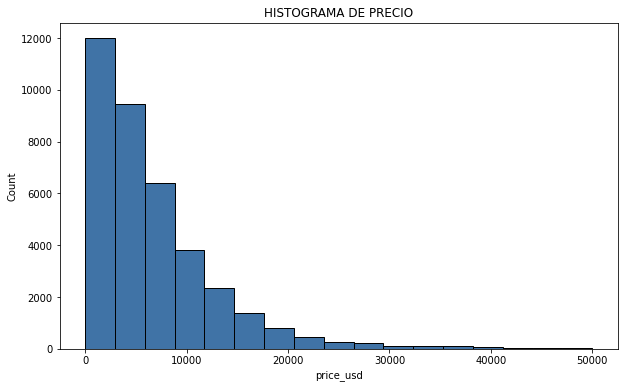

In [21]:
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(x='price_usd', # variable
            data=df , #datasets
            color='#004488',#color de las barras
            ax=axes, # asignacion del grafico al lienzo
            bins= sturges_intervals(df['price_usd'])[1] # numero de barras
            ).set(title='HISTOGRAMA DE PRECIO'); #kde = grafico de densidad
plt.show()

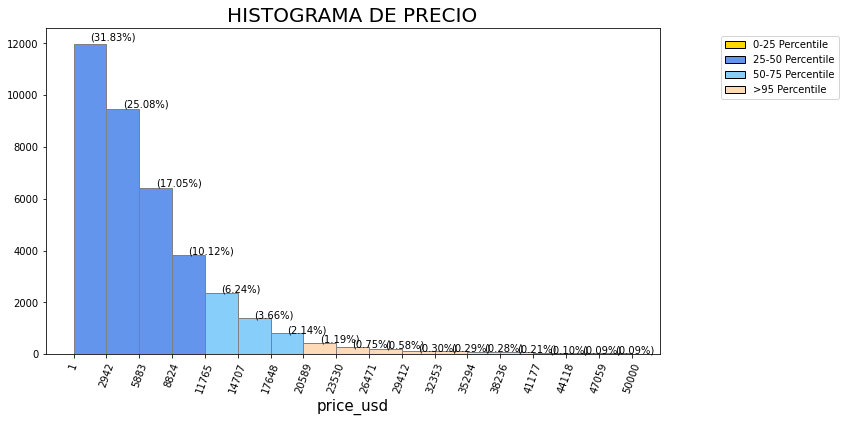

In [22]:
#grafico numerico categorico
from matplotlib.patches import Rectangle
import numpy as np
fig , axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(11,6))

# Extraccion de la variable
data = df['price_usd']

# Cambio de colores por percentil
perc_25_colour = 'gold'
perc_50_colour = 'cornflowerblue'
perc_75_colour = 'lightskyblue'
perc_95_colour = 'peachpuff'

#generacion de grafico en base a sturges
counts, bins, patches = axes.hist(data, facecolor=perc_50_colour, edgecolor='gray', bins='sturges')

#seteo de la variable x en su anotacion
axes.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Genereo titulo y nombre de eje
plt.title('HISTOGRAMA DE PRECIO', fontsize=20)
plt.xlabel('price_usd', fontsize=15)

#calculo de percentiles
q25, q75, q95 = np.percentile(data, [25, 75, 95])

#asignacion de colores segun barra y los valores de los percentiles
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

# ubicaion central de los eje de la barras x
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

# display de las anotaciones de cada barra en porcentaje
for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

* Hay una mayor concentracion de precios entre el rango 1 a 11765, que explica
el 84% de los precios de los vehiculos.
* Los precios no siguen una distribucion normal, y al tener un sesgo muy alto positivo, estos valores estan alineados a la izquierda.

## year_produced

In [23]:
df.stb.freq(['year_produced'])

year_produced  count   percent  cumulative_count  cumulative_percent
0            1998   2192  5.817564              2192            5.817564
1            2008   2130  5.653016              4322           11.470580
2            1999   1848  4.904589              6170           16.375169
3            1997   1845  4.896627              8015           21.271796
4            2001   1829  4.854163              9844           26.125959
5            2007   1722  4.570185             11566           30.696144
6            2002   1675  4.445447             13241           35.141591
7            2000   1645  4.365827             14886           39.507418
8            2010   1594  4.230473             16480           43.737891
9            1996   1491  3.957111             17971           47.695003
10           2003   1471  3.904031             19442           51.599034
11           2006   1431  3.797871             20873           55.396905
12           2009   1395  3.702328             22268           59.099233
13           2004   1339  3.553704             23607           62.652937
14           2011   1308  3.471430             24915           66.124366
15           2005   1180  3.131718             26095           69.256084
16           2014   1104  2.930014             27199           72.186098
17           1995   1060  2.813238             28259           74.999337
18           2015   1013  2.688500             29272           77.687837
19           2012    952  2.526606             30224           80.214443
20           2013    944  2.505374             31168           82.719817
21           1994    890  2.362058             32058           85.081876
22           1993    744  1.974575             32802           87.056451
23           2016    696  1.847183             33498           88.903633
24           1992    653  1.733061             34151           90.636694
25           1991    543  1.441121             34694           92.077815
26           2019    480  1.273919             35174           93.351734
27           2017    390  1.035059             35564           94.386794
28           1990    337  0.894397             35901           95.281191
29           1989    308  0.817431             36209           96.098623
30           1988    280  0.743120             36489           96.841742
31           2018    272  0.721888             36761           97.563630
32           1987    267  0.708618             37028           98.272247
33           1986    246  0.652884             37274           98.925131
34           1985    144  0.382176             37418           99.307306
35           1984     96  0.254784             37514           99.562090
36           1983     54  0.143316             37568           99.705406
37           1982     38  0.100852             37606           99.806258
38           1981     22  0.058388             37628           99.864646
39           1980     15  0.039810             37643           99.904456
40           1979      9  0.023886             37652           99.928342
41           1978      9  0.023886             37661           99.952228
42           1977      5  0.013270             37666           99.965498
43           1976      5  0.013270             37671           99.978768
44           1975      2  0.005308             37673           99.984076
45           1974      2  0.005308             37675           99.989384
46           1960      2  0.005308             37677           99.994692
47           1970      1  0.002654             37678           99.997346
48           1968      1  0.002654             37679          100.000000

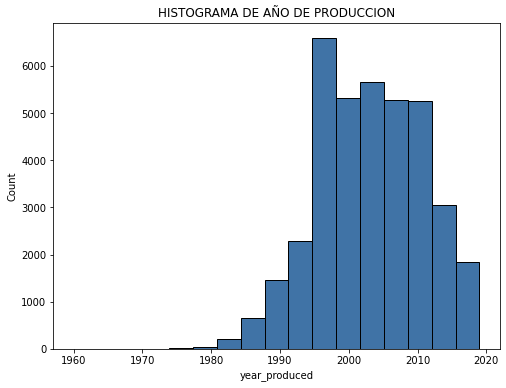

In [24]:
fig, axes = plt.subplots(figsize=(8,6))

sns.histplot(x='year_produced', # variable
            data=df , #datasets
            color='#004488',#color de las barras
            ax=axes, # asignacion del grafico al lienzo
            bins= sturges_intervals(df['year_produced'])[1] # numero de barras
            ).set(title='HISTOGRAMA DE AÑO DE PRODUCCION'); #kde = grafico de densidad
plt.show()

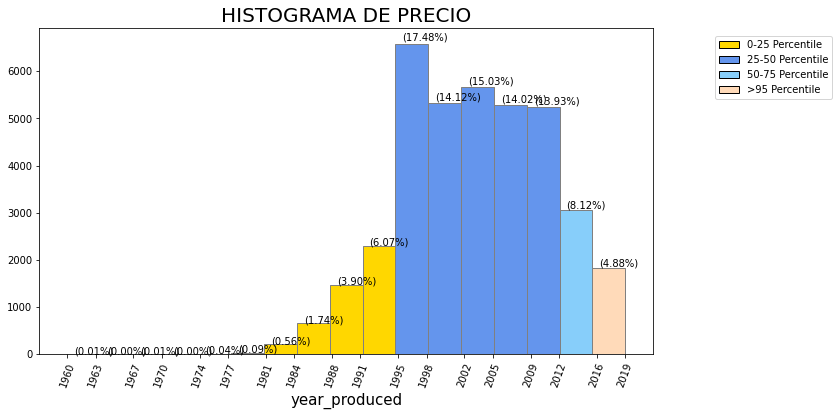

In [25]:
fig , axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(11,6))

# Extraccion de la variable
data = df['year_produced']

# Cambio de colores por percentil
perc_25_colour = 'gold'
perc_50_colour = 'cornflowerblue'
perc_75_colour = 'lightskyblue'
perc_95_colour = 'peachpuff'

#generacion de grafico en base a sturges
counts, bins, patches = axes.hist(data, facecolor=perc_50_colour, edgecolor='gray', bins='sturges')

#seteo de la variable x en su anotacion
axes.set_xticks(bins.round(0))
plt.xticks(rotation=70)

# Genereo titulo y nombre de eje
plt.title('HISTOGRAMA DE PRECIO', fontsize=20)
plt.xlabel('year_produced', fontsize=15)

#calculo de percentiles
q25, q75, q95 = np.percentile(data, [25, 75, 95])

#asignacion de colores segun barra y los valores de los percentiles
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

# ubicaion central de los eje de la barras x
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

# display de las anotaciones de cada barra en porcentaje
for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

* En este dataset se estan tomando en cuenta, autos fabricados desde el 1960 hasta el 2019. 
* Y la mayor concentracion de autos es para el año 1998.
* El 86% de los autos del dataset fueron producidos entre 1995 y 2016.
* Podemos ver que desde 1980 es donde se empezaron a crear mas autos.
* La columna year_produced al tener un sesgo negativo nos indica que la moda (1998) es mayor a la mediana (2003), es decir que los valores que mas se repiten son mayores al valor central dandonos un grafico centrado a la derecha, como se puede observar arriba.


## Color

In [26]:
df.stb.freq(['color'])

color  count    percent  cumulative_count  cumulative_percent
0    black   7632  20.255315              7632           20.255315
1   silver   6800  18.047188             14432           38.302503
2     blue   5685  15.087980             20117           53.390483
3    white   4054  10.759309             24171           64.149792
4     grey   3705   9.833064             27876           73.982855
5      red   2825   7.497545             30701           81.480400
6    green   2630   6.980015             33331           88.460416
7    other   2591   6.876509             35922           95.336925
8    brown    871   2.311632             36793           97.648558
9   violet    451   1.196953             37244           98.845511
10  yellow    269   0.713926             37513           99.559436
11  orange    166   0.440564             37679          100.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


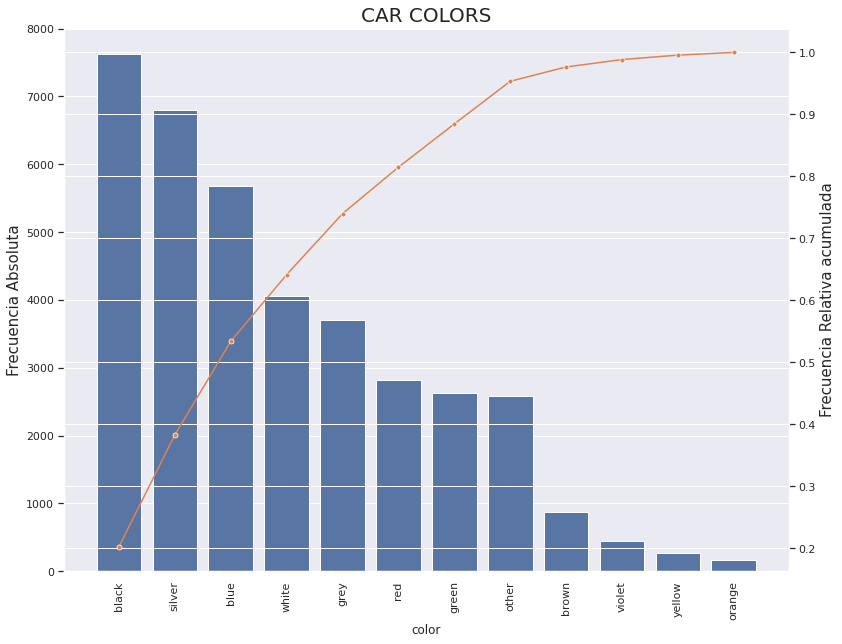

In [27]:
#categorico
sns.set()
fig, axes = plt.subplots(figsize=(13,10))

models = freq_table(df, 'color', with_cuts=False).reset_index().sort_values('FreqAbs', ascending=False)

sns.barplot(data=models, x='color', y='FreqAbs', ax=axes, color="C0")


ax2 = axes.twinx()
sns.lineplot(models['color'], models["FRelAcumulada"], color="C1", marker="o", ms=5, ax=ax2)

axes.set_title('CAR COLORS', fontsize = 20)
axes.set_ylabel('Frecuencia Absoluta', fontsize=15)
ax2.set_ylabel('Frecuencia Relativa acumulada', fontsize=15)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()


* La mayor concentracion de colores para un auto va desde el negro hasta el rojo,que representan el 80% del total de colores.
* Esta variable esta sesgada a la izquierda.


## engine_fuel

In [28]:
df.stb.freq(['engine_fuel'])

engine_fuel  count    percent  cumulative_count  cumulative_percent
0       gasoline  23284  61.795695             23284           61.795695
1         diesel  12848  34.098569             36132           95.894265
2            gas   1300   3.450198             37432           99.344462
3  hybrid-petrol    235   0.623690             37667           99.968152
4       electric     10   0.026540             37677           99.994692
5  hybrid-diesel      2   0.005308             37679          100.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


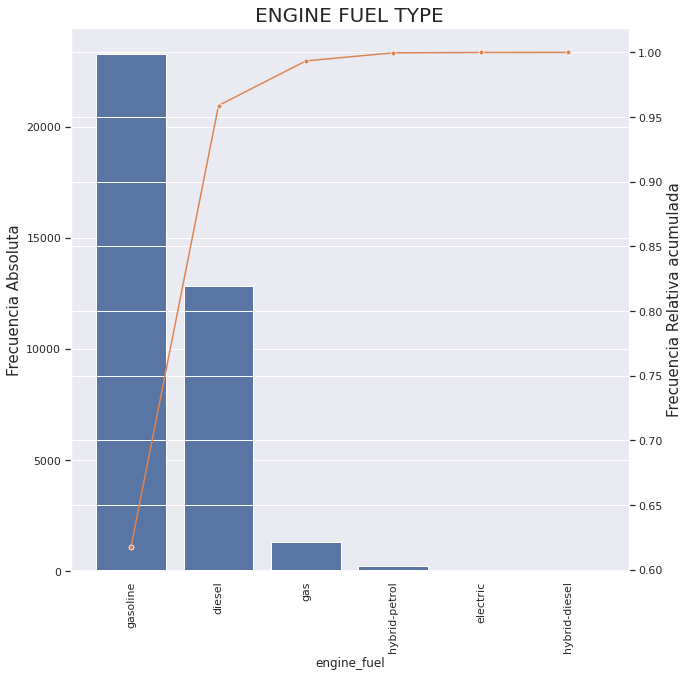

In [29]:
sns.set()
fig, axes = plt.subplots(figsize=(10,10))

models = freq_table(df, 'engine_fuel', with_cuts=False).reset_index().sort_values('FreqAbs', ascending=False)

sns.barplot(data=models, x='engine_fuel', y='FreqAbs', ax=axes, color="C0")


ax2 = axes.twinx()
sns.lineplot(models['engine_fuel'], models["FRelAcumulada"], color="C1", marker="o", ms=5, ax=ax2)

axes.set_title('ENGINE FUEL TYPE', fontsize = 20)
axes.set_ylabel('Frecuencia Absoluta', fontsize=15)
ax2.set_ylabel('Frecuencia Relativa acumulada', fontsize=15)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()

* La mayor cantidad de autos son nafteros y diesel que concentran mas del 95% de los casos.
* Al ser un dataset con autos desde 1960 hasta el 2019, donde el 86% de los autos del dataset fueron producidos entre 1995 y 2016. Resulta normal que no haya pocos autos electricos o en variantes hibridas.

## manufacturer_name

In [30]:
df_manufacturer = df.stb.freq(['manufacturer_name']).sort_values('count', ascending=False)
df_manufacturer = df_manufacturer[df_manufacturer["count"]>300] #seleccionamos aquellos que poseen mas registros.
df_manufacturer

manufacturer_name  count    percent  cumulative_count  cumulative_percent
0         Volkswagen   4243  11.260915              4243           11.260915
1               Opel   2759   7.322381              7002           18.583296
2                BMW   2610   6.926935              9612           25.510231
3               Ford   2566   6.810160             12178           32.320391
4            Renault   2493   6.616418             14671           38.936808
5               Audi   2468   6.550068             17139           45.486876
6      Mercedes-Benz   2237   5.936994             19376           51.423870
7            Peugeot   1909   5.066483             21285           56.490353
8            Citroen   1562   4.145545             22847           60.635898
9             Nissan   1361   3.612092             24208           64.247990
10             Mazda   1328   3.524510             25536           67.772499
11            Toyota   1246   3.306882             26782           71.079381
12           Hyundai   1116   2.961862             27898           74.041243
13             Skoda   1089   2.890204             28987           76.931447
14               Kia    912   2.420446             29899           79.351894
15        Mitsubishi    887   2.354096             30786           81.705990
16              Fiat    824   2.186895             31610           83.892885
17             Honda    797   2.115237             32407           86.008121
18             Volvo    721   1.913533             33128           87.921654
19         Chevrolet    436   1.157143             33564           89.078797
20          Chrysler    410   1.088139             33974           90.166936
21              Seat    303   0.804161             34277           90.971098

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


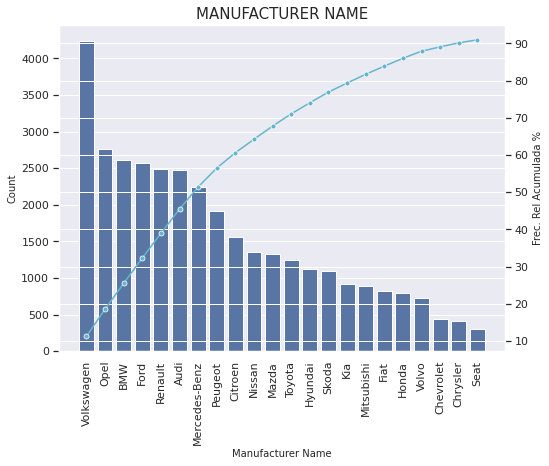

In [31]:
sns.set()
fig, axes = plt.subplots(figsize=(8,6))

sns.barplot(data=df_manufacturer, x='manufacturer_name', y='count', ax=axes, color="C0")

ax2 = axes.twinx()
sns.lineplot(df_manufacturer['manufacturer_name'], df_manufacturer["cumulative_percent"], color="C9", marker="o", ms=5, ax=ax2)

axes.set_title('MANUFACTURER NAME', fontsize = 15)
axes.set_ylabel('Count', fontsize=10)
axes.set_xlabel('Manufacturer Name', fontsize=10)
ax2.set_ylabel('Frec. Rel Acumulada %', fontsize=10)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()


* Podemos observar que el top 10 de las marcas explican el 65% de los casos.
* Existe una gran diferencia de Volkswagen con respecto a las otras marcas, debido a que es una marca generalista y uno de los lideres mundiales en ventas.

## model_name

In [32]:
df_model = df.stb.freq(['model_name']).sort_values('count', ascending=False)
df_model = df_model[df_model["count"]>300] #seleccionamos aquellos que tienen mas registros.
df_model

model_name  count   percent  cumulative_count  cumulative_percent
0      Passat   1423  3.776640              1423            3.776640
1       Astra    751  1.993153              2174            5.769792
2        Golf    707  1.876377              2881            7.646169
3          A6    687  1.823297              3568            9.469466
4      Mondeo    637  1.690597              4205           11.160063
5      Vectra    565  1.499509              4770           12.659572
6      Laguna    548  1.454391              5318           14.113963
7          A4    505  1.340269              5823           15.454232
8         406    415  1.101409              6238           16.555641
9       Omega    387  1.027097              6625           17.582738
10      Focus    380  1.008519              7005           18.591258
11     Megane    377  1.000557              7382           19.591815
12        100    371  0.984633              7753           20.576448
13    Octavia    367  0.974017              8120           21.550466
14     Zafira    356  0.944823              8476           22.495289
15     Xantia    355  0.942169              8831           23.437459
16        525    354  0.939515              9185           24.376974
17    Primera    346  0.918283              9531           25.295257
18     Scenic    323  0.857241              9854           26.152499
19        626    321  0.851933             10175           27.004432
20         C5    316  0.838663             10491           27.843096
21         80    304  0.806815             10795           28.649911
22    Transit    301  0.798853             11096           29.448765

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


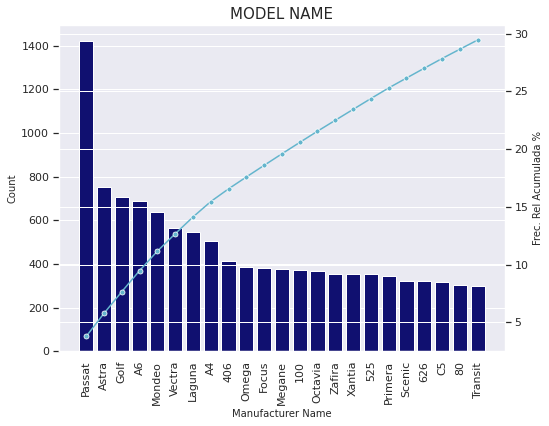

In [33]:
sns.set()
fig, axes = plt.subplots(figsize=(8,6))

sns.barplot(data=df_model, x='model_name', y='count', ax=axes, color="Navy")

ax2 = axes.twinx()
sns.lineplot(df_model['model_name'], df_model["cumulative_percent"], color="C9", marker="o", ms=5, ax=ax2)

axes.set_title('MODEL NAME', fontsize = 15)
axes.set_ylabel('Count', fontsize=10)
axes.set_xlabel('Manufacturer Name', fontsize=10)
ax2.set_ylabel('Frec. Rel Acumulada %', fontsize=10)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()

* Model name es una variable categorica de 1037 valores unicos. Luego de analizar la tabla de frecuencias podemos observar que hay 22 modelos que explica el 30% del total de registros del dataset.
* El modelo mas publicado es el VW Passat teniendo aproximadamente un 50% mas publicaciones que el segundo modelos de la lista.

## engine_capacity

In [34]:
df_engine_cap = df.stb.freq(['engine_capacity']).sort_values('count', ascending=False)
df_engine_cap =df_engine_cap[df_engine_cap["count"]>500]
df_engine_cap

engine_capacity  count    percent  cumulative_count  cumulative_percent
0              2.0   7658  20.324319              7658           20.324319
1              1.6   6052  16.061997             13710           36.386316
2              1.8   4233  11.234375             17943           47.620691
3              2.5   2506   6.650920             20449           54.271610
4              1.4   2388   6.337748             22837           60.609358
5              1.9   2303   6.112158             25140           66.721516
6              2.2   1850   4.909897             26990           71.631413
7              3.0   1518   4.028769             28508           75.660182
8              2.4   1427   3.787256             29935           79.447438
9              1.5   1255   3.330768             31190           82.778205
10             1.3    753   1.998461             31943           84.776666
11             2.3    742   1.969267             32685           86.745933
12             3.5    707   1.876377             33392           88.622310
13             1.2    532   1.411927             33924           90.034237

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


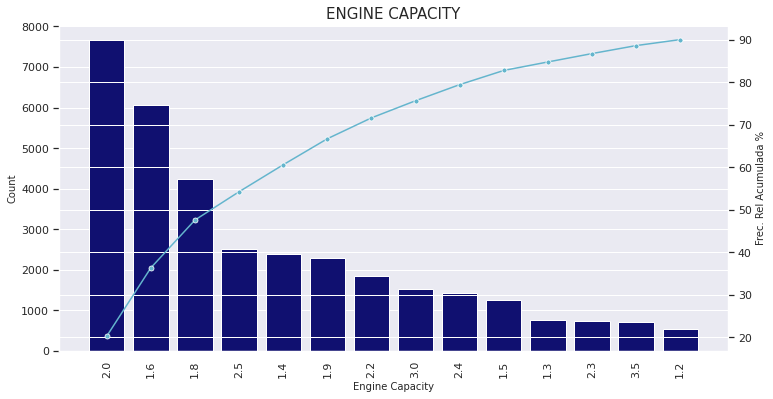

In [35]:
sns.set()
fig, axes = plt.subplots(figsize=(12,6))

sns.barplot(data=df_engine_cap, x='engine_capacity', y='count', ax=axes, color="Navy")

ax2 = axes.twinx()
sns.lineplot(df_engine_cap['engine_capacity'], df_engine_cap["cumulative_percent"], color="C9", marker="o", ms=5, ax=ax2)

axes.set_title('ENGINE CAPACITY', fontsize = 15)
axes.set_ylabel('Count', fontsize=10)
axes.set_xlabel('Engine Capacity', fontsize=10)
ax2.set_ylabel('Frec. Rel Acumulada %', fontsize=10)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()

In [36]:
df_engine_cap2 = df_engine_cap.sort_values('engine_capacity', ascending=True)
df_engine_cap2 #ordenamos por engine capacity para entender el rango de motorizaciones que abarca

engine_capacity  count    percent  cumulative_count  cumulative_percent
13             1.2    532   1.411927             33924           90.034237
10             1.3    753   1.998461             31943           84.776666
4              1.4   2388   6.337748             22837           60.609358
9              1.5   1255   3.330768             31190           82.778205
1              1.6   6052  16.061997             13710           36.386316
2              1.8   4233  11.234375             17943           47.620691
5              1.9   2303   6.112158             25140           66.721516
0              2.0   7658  20.324319              7658           20.324319
6              2.2   1850   4.909897             26990           71.631413
11             2.3    742   1.969267             32685           86.745933
8              2.4   1427   3.787256             29935           79.447438
3              2.5   2506   6.650920             20449           54.271610
7              3.0   1518   4.028769             28508           75.660182
12             3.5    707   1.876377             33392           88.622310

* Como podemos observar a partir del grafico y la tabla precedente es que las motorizaciones que van del 1.2lts a 3.5lts representan el 90% de los autos publicados.Sin embargo, algunas motorizaciones no aparecen representadas, ya que son motorizaciones poco comunes en el mercado. Ej: 2.1, 3.1

## body_type

In [37]:
df_body = df.stb.freq(['body_type']).sort_values('count', ascending=False)
df_body

body_type  count    percent  cumulative_count  cumulative_percent
0       sedan  12559  33.331564             12559           33.331564
1   hatchback   7511  19.934181             20070           53.265745
2   universal   5471  14.520024             25541           67.785769
3         suv   5037  13.368189             30578           81.153958
4     minivan   3607   9.572972             34185           90.726930
5     minibus   1334   3.540434             35519           94.267364
6         van    762   2.022347             36281           96.289710
7       coupe    645   1.711829             36926           98.001539
8    liftback    550   1.459699             37476           99.461238
9      pickup    120   0.318480             37596           99.779718
10  cabriolet     71   0.188434             37667           99.968152
11  limousine     12   0.031848             37679          100.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


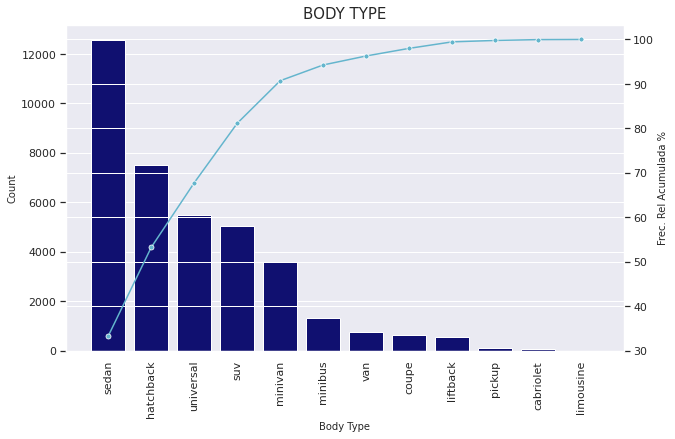

In [38]:
sns.set()
fig, axes = plt.subplots(figsize=(10,6))

sns.barplot(data=df_body, x='body_type', y='count', ax=axes, color="Navy")

ax2 = axes.twinx()
sns.lineplot(df_body['body_type'], df_body["cumulative_percent"], color="C9", marker="o", ms=5, ax=ax2)

axes.set_title('BODY TYPE', fontsize = 15)
axes.set_ylabel('Count', fontsize=10)
axes.set_xlabel('Body Type', fontsize=10)
ax2.set_ylabel('Frec. Rel Acumulada %', fontsize=10)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()

* Como podemos observar a partir del grafico los autos tipo: Sedan, Hatchback, Universal, SUV y Minivan, representan el 90% de los autos publicados del dataset.Por lo tanto 5 categorias de las 12 explican el 90% de los datos.

# Analisis Bivariado

In [39]:
matrix_correlation = df.corr("spearman") #utilizamos spearman por tener gran cantidad de datos y muchos de los mismos no poseen dist. normal.
matrix_correlation

odometer_value  year_produced  engine_has_gas  has_warranty  \
odometer_value          1.000000      -0.615880        0.071467     -0.181274   
year_produced          -0.615880       1.000000       -0.083015      0.183737   
engine_has_gas          0.071467      -0.083015        1.000000     -0.020713   
has_warranty           -0.181274       0.183737       -0.020713      1.000000   
price_usd              -0.492272       0.868019       -0.066304      0.167703   
is_exchangeable         0.048447      -0.073598        0.019307      0.119242   
number_of_photos       -0.162381       0.275405       -0.034082      0.107765   
up_counter             -0.023120       0.075159        0.015280     -0.038033   
feature_0               0.131198      -0.335885        0.000613      0.158118   
feature_1              -0.179611       0.420489       -0.005856     -0.126223   
feature_2              -0.091927       0.211940       -0.010816     -0.047248   
feature_3              -0.273626       0.456029       -0.026689     -0.038538   
feature_4              -0.083255       0.196911        0.005091     -0.048232   
feature_5              -0.285286       0.453510       -0.030641     -0.047448   
feature_6              -0.196018       0.365698       -0.030050     -0.023164   
feature_7              -0.301813       0.480553       -0.036500     -0.027148   
feature_8              -0.249432       0.488440       -0.041205     -0.061741   
feature_9              -0.110540       0.242481       -0.003958     -0.098725   
duration_listed         0.030355       0.007699        0.024801     -0.131680   

                  price_usd  is_exchangeable  number_of_photos  up_counter  \
odometer_value    -0.492272         0.048447         -0.162381   -0.023120   
year_produced      0.868019        -0.073598          0.275405    0.075159   
engine_has_gas    -0.066304         0.019307         -0.034082    0.015280   
has_warranty       0.167703         0.119242          0.107765   -0.038033   
price_usd          1.000000        -0.044608          0.313463    0.102579   
is_exchangeable   -0.044608         1.000000          0.099800    0.199750   
number_of_photos   0.313463         0.099800          1.000000    0.199971   
up_counter         0.102579         0.199750          0.199971    1.000000   
feature_0         -0.358653         0.020599         -0.118081   -0.093709   
feature_1          0.405424        -0.042697          0.100264    0.118666   
feature_2          0.347281         0.043915          0.126558    0.096008   
feature_3          0.522253        -0.031932          0.171865    0.086346   
feature_4          0.353898         0.008835          0.132513    0.095875   
feature_5          0.518074        -0.025714          0.161686    0.099860   
feature_6          0.453615        -0.000600          0.169295    0.084669   
feature_7          0.535107        -0.024144          0.183468    0.100257   
feature_8          0.556800        -0.002739          0.199433    0.147551   
feature_9          0.346350         0.027492          0.139093    0.121133   
duration_listed    0.044024        -0.023832         -0.088969    0.453091   

                  feature_0  feature_1  feature_2  feature_3  feature_4  \
odometer_value     0.131198  -0.179611  -0.091927  -0.273626  -0.083255   
year_produced     -0.335885   0.420489   0.211940   0.456029   0.196911   
engine_has_gas     0.000613  -0.005856  -0.010816  -0.026689   0.005091   
has_warranty       0.158118  -0.126223  -0.047248  -0.038538  -0.048232   
price_usd         -0.358653   0.405424   0.347281   0.522253   0.353898   
is_exchangeable    0.020599  -0.042697   0.043915  -0.031932   0.008835   
number_of_photos  -0.118081   0.100264   0.126558   0.171865   0.132513   
up_counter        -0.093709   0.118666   0.096008   0.086346   0.095875   
feature_0          1.000000  -0.672192  -0.286072  -0.329361  -0.300269   
feature_1         -0.672192   1.000000   0.247020   0.315968   0.262730   
feature_2  

In [40]:
sns.set()
sns.set_theme(style="whitegrid")
sns.color_palette("pastel")
sns.set_color_codes("pastel")

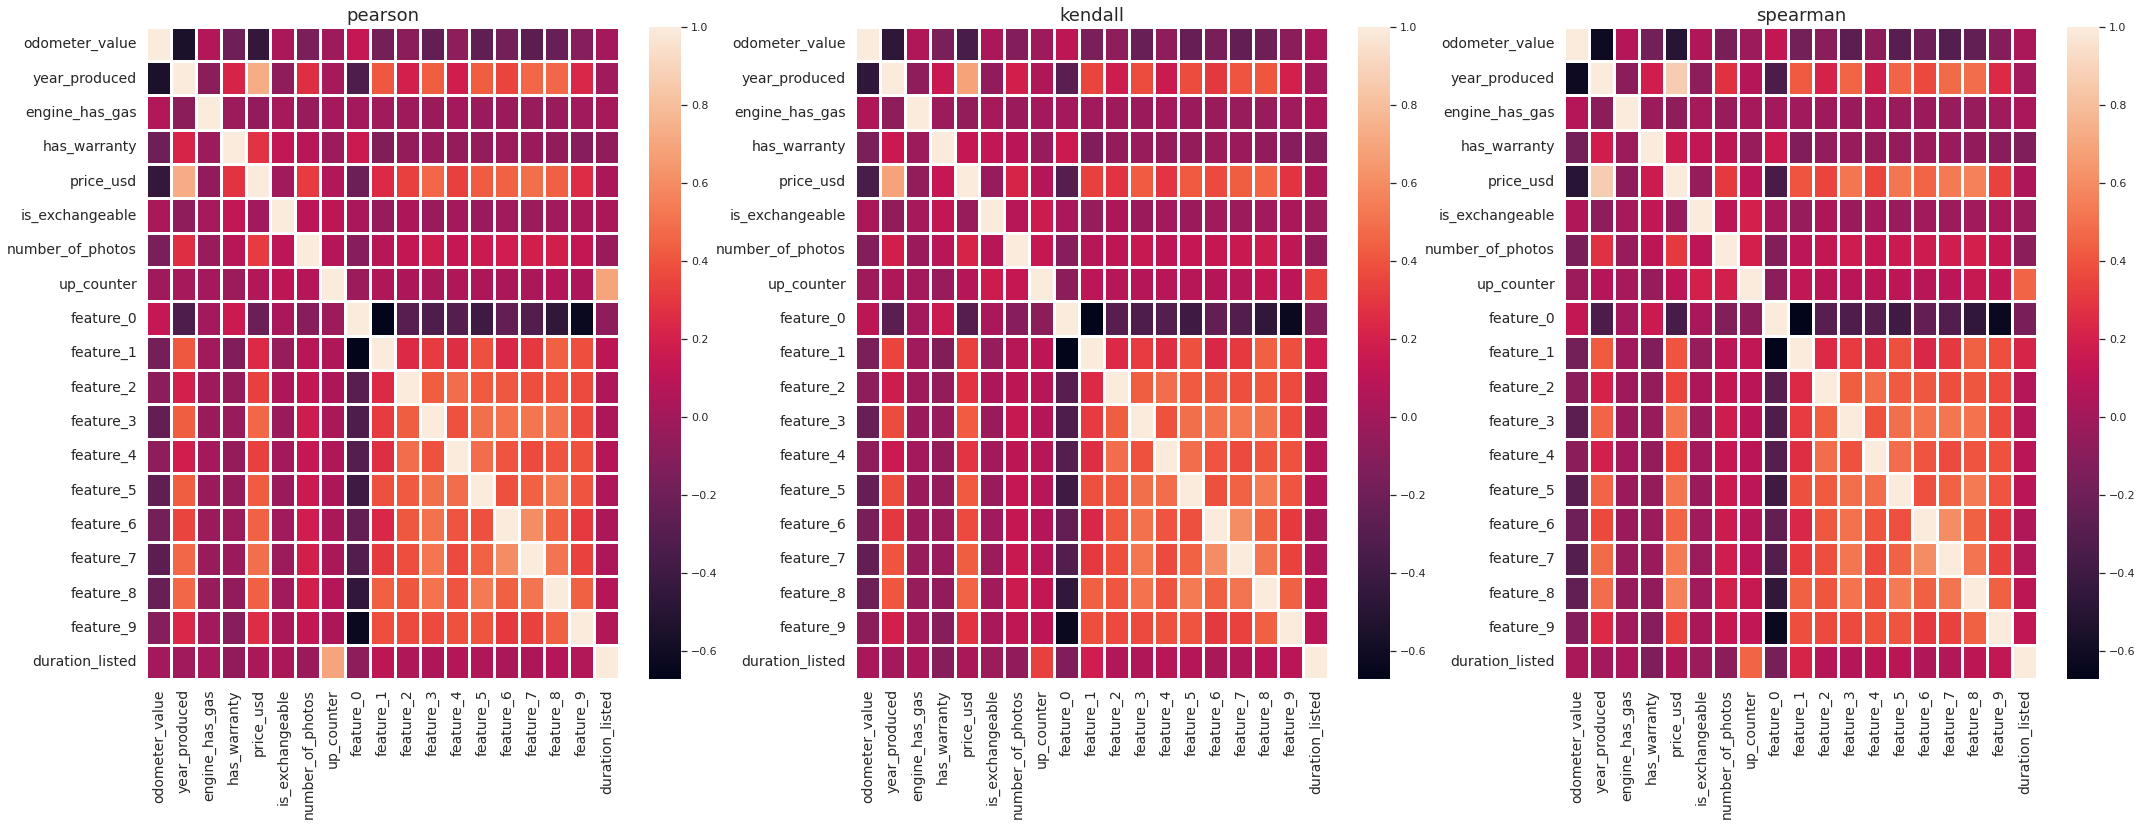

In [41]:
#generacion de los graficos de correlacion entre los 3 metodos,

plt.figure(figsize=(36,12))
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)

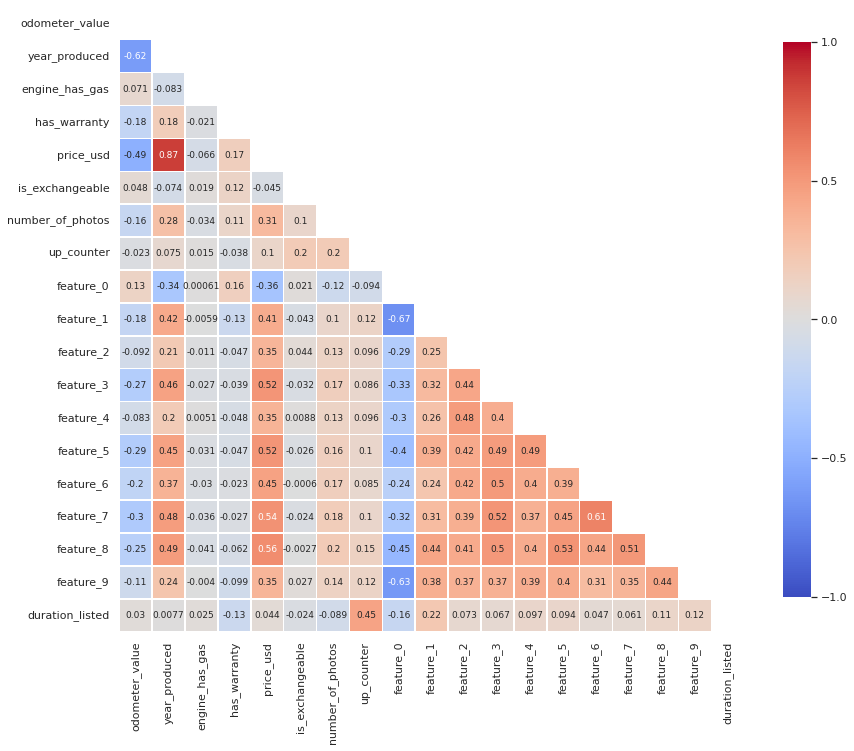

In [42]:
mask = np.triu(np.ones_like(matrix_correlation, dtype=bool))
f, ax = plt.subplots(figsize=(14, 17)) 
heatmap = sns.heatmap(matrix_correlation, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .6, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 9})
#add the column names as labels
ax.set_yticklabels(matrix_correlation.columns, rotation = 0)
ax.set_xticklabels(matrix_correlation.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Variable_1     Variable_2  corr_value
2   year_produced      price_usd    0.868019
5       feature_6      feature_7    0.606332
1  odometer_value  year_produced   -0.615880
4       feature_0      feature_9   -0.630131
3       feature_0      feature_1   -0.672192

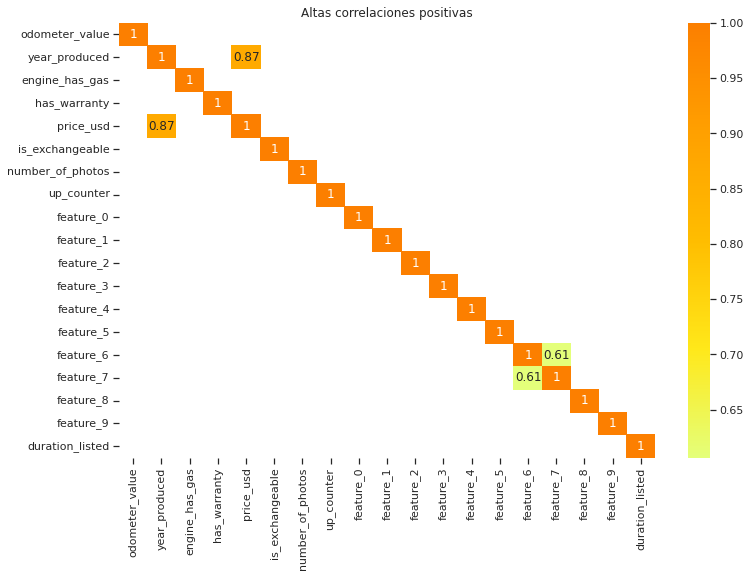

In [43]:
#metodo para solo graficar en base a un threshold

mat_corr_spearman = df.corr('spearman')

high_corr = mat_corr_spearman[mat_corr_spearman>=0.6] #se podra poner ambas condiciones para mostrar tambien los negativos.
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Wistia", annot = True)
plt.title('Altas correlaciones positivas');

def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

df_corr = corrFilter(df, .6)
df_corr

* Se observa una fuerte relacion entre el año de produccion del vehiculo y el precio.
* Se observa una fuerte relacion negativa entre el kilometraje del vehiculo y el año de producción del mismo.
* Existe relacion positiva entre feature_6 y feature_7
* Existe relacion negativa entre feature_0 y feature_9
* Existe relacion negativa entre feature_0 y feature_1
* La columna count_features surge a través del análisis mutilvariado. Podemos observar que existe una relación positiva entre count_features y price_usd y se observa también una relación positiva entre features de la 1 a 9

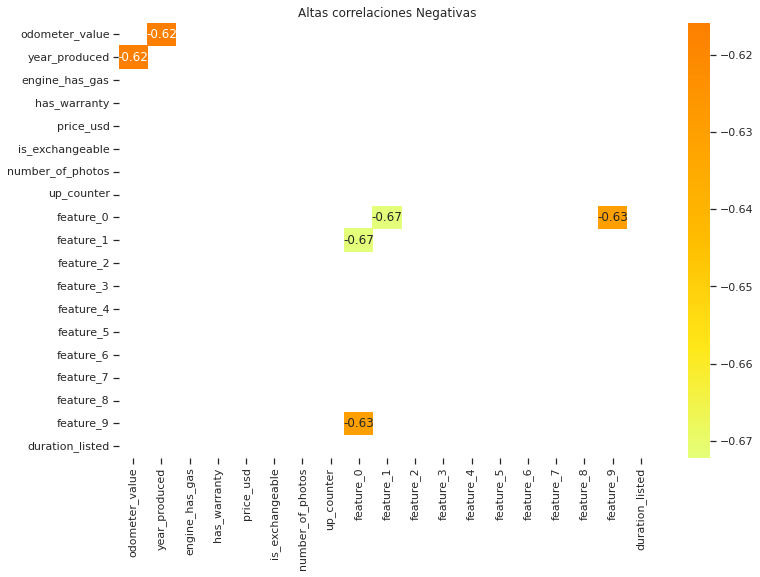

In [44]:
#metodo para solo graficar en base a un threshold

mat_corr_spearman = df.corr('spearman')

high_corr = mat_corr_spearman[mat_corr_spearman<=-0.60]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Wistia", annot = True)
plt.title('Altas correlaciones Negativas');

Text(0.5, 1.02, 'Grafico de puntos en variables numericas')

<Figure size 720x720 with 0 Axes>

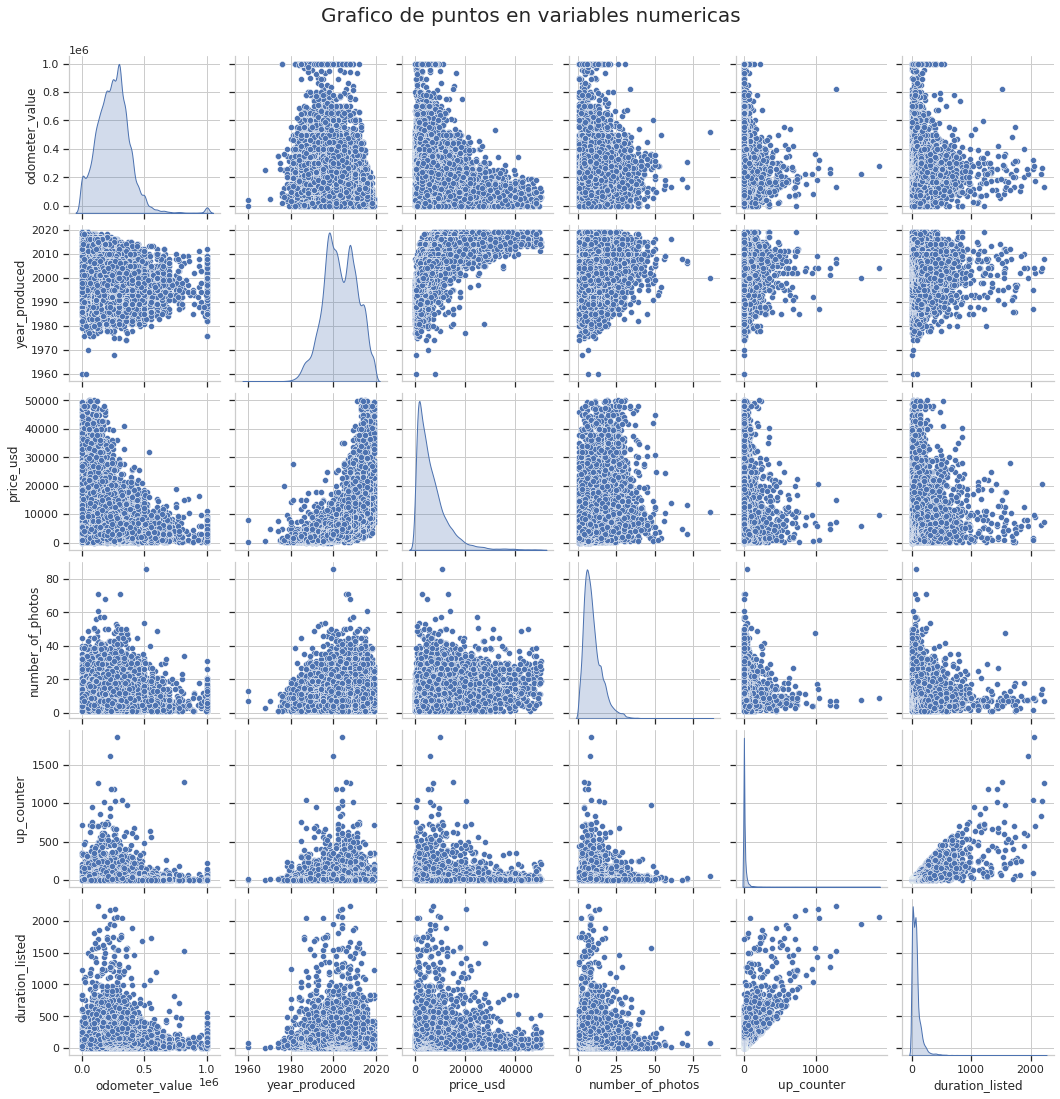

In [45]:
plt.figure(figsize=(10, 10))

g = sns.pairplot(df[['odometer_value', 'year_produced', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']], diag_kind='kde',palette="light:#69d");
g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02)

**year_produced con odometer_value =** El grafico nos muestra que a medida que aumentan el kilometraje hay menos datos contrados en los años recientes.Lo cual es esperado ya que los autos mas nuevos suelen tener
menos kilometros que los antiguos.

**price_usd con odometer_value =** El graficos nos muestra que a medida que aumentan los kilometros. Los datos se concetran en precios menores. Lo cual es esperado que cuanto mas kilometros menos costoso es el auto.

**price_usd con year_produced =** El graficos nos muestra que a medida que aumentan el año de fabricacion del vehiculo el precio es superior.

**up_counter con duration_listed =** El graficos nos muestra que cuantos mas veces fue publicado el anuncio del vehiculo mas tiempo estuvo publicado.

Text(0.5, 1.0, 'Grafico relacion Engine con "Has gas')

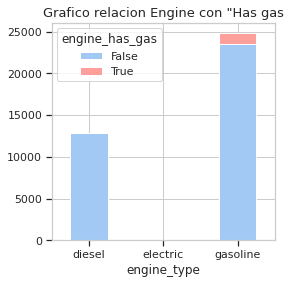

In [46]:
fig, axes = plt.subplots(figsize=(10,10))
cross = pd.crosstab(df['engine_type'] , df['engine_has_gas'])
cross.plot(kind="bar", stacked=True, rot=0,figsize=(4,4),ax=axes,color=['b', 'r'])
axes.set_title('Grafico relacion Engine con "Has gas', fontsize = 13)

Como podemos observar en el grafico, los vehiculos con motor Diesel no poseen equipos de gas. En cuanto a los vehiculos a gasolina, se puede apreciar que solo una pequeña parte de los mismos poseen equipo de gas.

In [47]:
location_group = df.groupby('location_region').mean()[['price_usd']]
location_group.reset_index()

location_region    price_usd
0    Brest region  5142.684318
1    Gomel region  5122.521325
2   Grodno region  4792.674610
3    Minsk region  7778.785618
4  Mogilev region  4745.505443
5  Vitebsk region  4965.734295

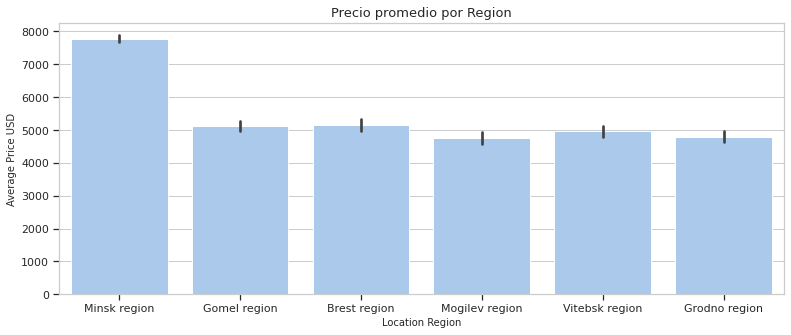

In [48]:
fig, ax = plt.subplots(figsize=(13,5))

sns.barplot(x='location_region',y="price_usd", data=df,color="b")
ax.set_title('Precio promedio por Region', fontsize = 13)
ax.set_ylabel('Average Price USD', fontsize=10)
ax.set_xlabel('Location Region', fontsize=10)
ax.tick_params(axis='x', rotation=0)

Como se puede observar en el grafico, la region de Minsk tiene el mayor precio promedio de autos publicados, seguido por Gomel y Brest.

In [49]:
median_group = pd.DataFrame(df.groupby('location_region').median()[['price_usd']])
median_group.reset_index(inplace=True)

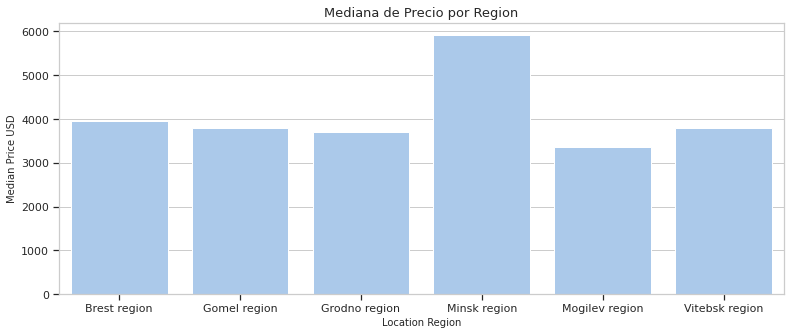

In [50]:
fig, ax = plt.subplots(figsize=(13,5))

sns.barplot(x='location_region',y="price_usd", data=median_group,color="b")
ax.set_title('Mediana de Precio por Region', fontsize = 13)
ax.set_ylabel('Median Price USD', fontsize=10)
ax.set_xlabel('Location Region', fontsize=10)
ax.tick_params(axis='x', rotation=0)

Como se puede observar en el grafico, la region de Minsk tiene el mayor precio considerando la mediana de autos publicados, seguido por Brest y Gomel.

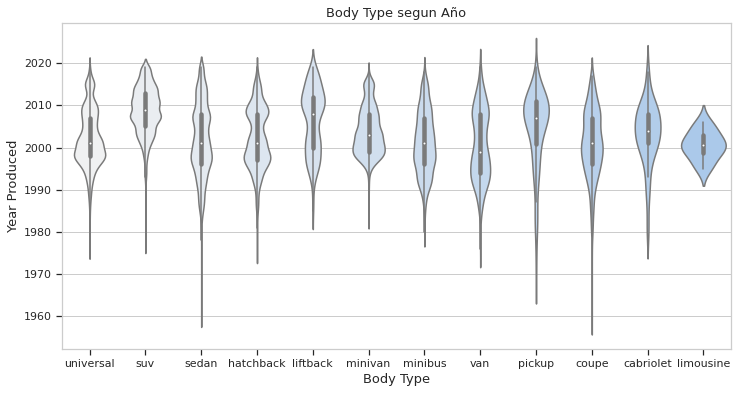

In [51]:
fig, ax = plt.subplots(figsize=(12,6))

sns.violinplot(x=df["body_type"], y=df["year_produced"],palette="light:b")
ax.set_title("Body Type segun Año", fontsize = 13)
ax.set_ylabel('Year Produced', fontsize=13)
ax.set_xlabel('Body Type', fontsize=13)
plt.show()

Como podemos observar tanto las categorias, Sedan, Pickup y Coupe son tipos de vehiculos historicos por lo que tienen presencia en un mayor rango de años. En cambio, las SUVs son mas recientes y podemos ver que con su introduccion al mercado, les ha quitado protagonismo a los sedanes y los universales (wagons) y minivans.

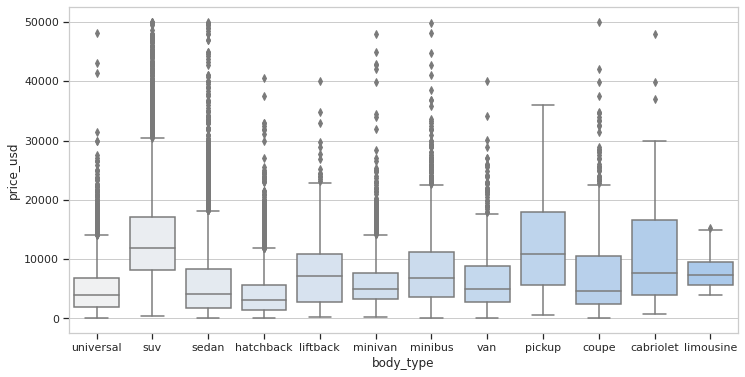

In [52]:
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot( x=df["body_type"], y=df["price_usd"],palette="light:b" )
ax.set_title("Body Type y Precio", fontsize = 13)
ax.set_ylabel('Price USD', fontsize=13)
ax.set_xlabel('Body Type', fontsize=13)
plt.show()

Como podemos observar en el grafico. Los sedanes, hatchbacks y universales (wagons) poseen un precio similar. Sin embargo, los SUVs y Pickups poseen un valor similar ya que son vehiculos de mayor porte. Podemos observar que en varias categorias hay outliers.

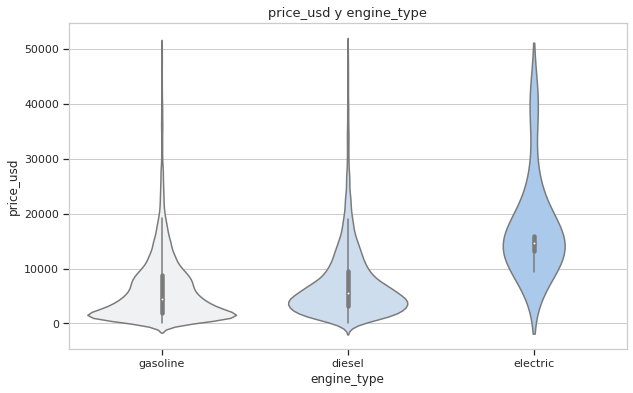

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(x=df["engine_type"], y=df["price_usd"],palette="light:b")
ax.set_title("price_usd y engine_type",fontsize=13)
ax.set_ylabel("price_usd")
ax.set_xlabel("engine_type")
plt.show()

Como se puede observar entre autos de gasolina y diesel que la mayor concentracion esta en el rango 1.000 a 10.000. Siendo los autos diesel un poco mas costos que los de gasolina como se podia esperar. En cuanto a los autos electricos al ser todavia una categoria nueva son mas costosos que los antes mencionados y hay una gran dispersion de precios en un rango mas amplio de valores.

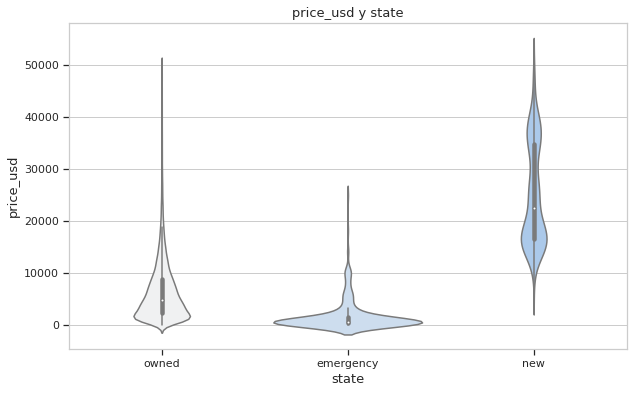

In [54]:
fig, ax = plt.subplots(figsize=(10,6))

sns.violinplot(x=df["state"], y=df["price_usd"],palette="light:b")
ax.set_title("price_usd y state",fontsize=13)
ax.set_ylabel("price_usd",fontsize=13)
ax.set_xlabel("state",fontsize=13)
plt.show()


Segun el estado del auto el precio puede llegar a variar bastante, como se puede ver en el caso de los autos nuevos que suelen salir mas caros que los owned (usados).

Y entre los usados y los que tienen estado de emergencia, se aprecia que estos ultimos son mas barato todavia que uno usado, ya que hay que hacerle arreglos al mismo, necesitando gastar mas.

Text(0.5, 1.0, 'Transmision en relacion a al año de Produccion')

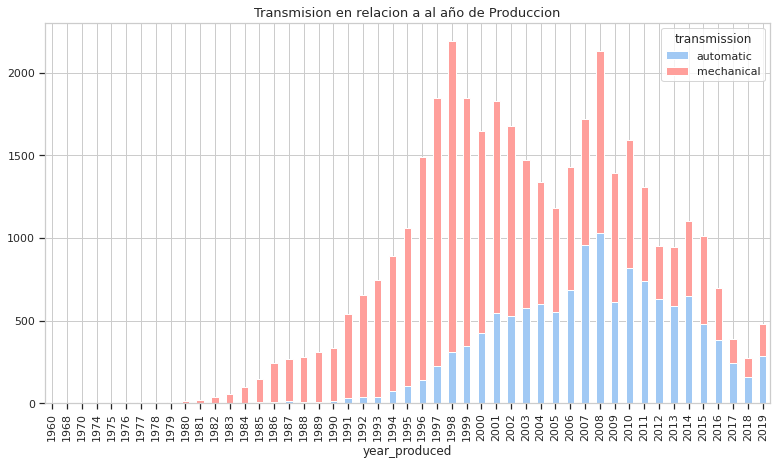

In [55]:
fig, axes = plt.subplots(figsize=(8,8))
cross = pd.crosstab(df['year_produced'] , df['transmission'])
cross.plot(kind="bar", stacked=True, rot=90,figsize=(13,7),ax=axes,color=['b', 'r'])
axes.set_title('Transmision en relacion a al año de Produccion', fontsize = 13)

Como se puede observar en el grafico, vemos que las transmisiones automaticas empezaron a crecer durante la decada de los 90s, para afianzarse a partir del 2000. Luedo, durante la ultima decada con el se fue incrementando la proporcion de transmisiones manuales con respecto

Text(0.5, 1.0, 'Traccion del vehiculo en relacion al tipo')

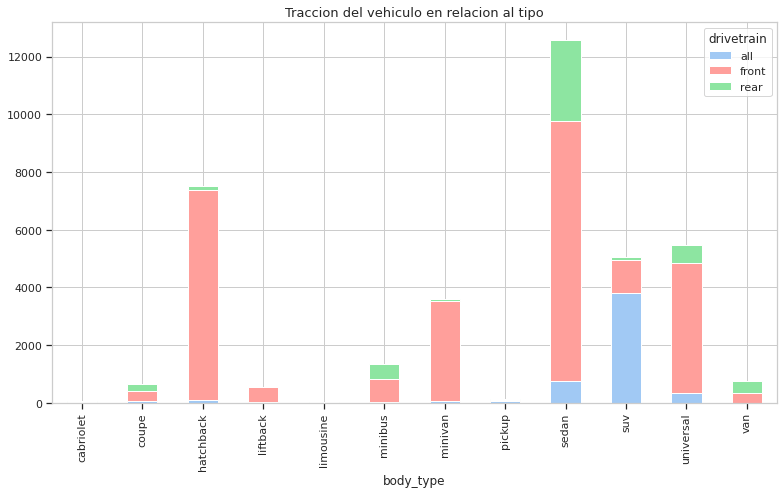

In [56]:
fig, axes = plt.subplots(figsize=(8,8))
cross = pd.crosstab(df['body_type'] , df['drivetrain'])
cross.plot(kind="bar", stacked=True, rot=90,figsize=(13,7),ax=axes,color=['b', 'r','g'])
axes.set_title('Traccion del vehiculo en relacion al tipo', fontsize = 13)

Como podemos observar en el grafico el tipo de traccion dominante en la mayoria de las categorias es el "Front". Sin embargo, como era de esperarse en la categoria pickups solo vemos "All" osea traccion integral y en los SUVs tambien vemos que la mayor proporcion es de traccion "All" (integral).

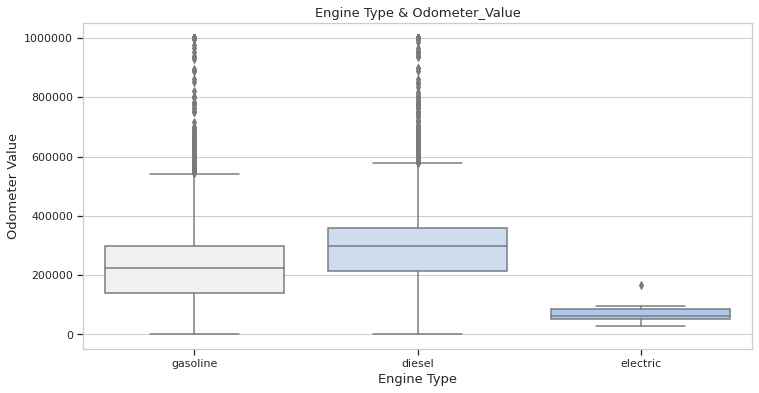

In [57]:
fig, ax = plt.subplots(figsize=(12,6))
plt.ticklabel_format(style='plain')
sns.boxplot( x=df["engine_type"], y=df["odometer_value"],palette="light:b" )
ax.set_title("Engine Type & Odometer_Value", fontsize = 13)
ax.set_ylabel('Odometer Value', fontsize=13)
ax.set_xlabel('Engine Type', fontsize=13)
plt.show()

Como podemos observar en el grafico, la mayor cantidad de autos publicados poseen motor a gasolina. Por otro lado, la mediana del tipo de motor a diesel es más elevada que la mediana de los motores a gasolina y eléctricos, lo cual era de esperarse siendo que los autos a diesel suelen tener muchos más kilómetros de vida útil.

In [58]:
fig = px.violin(df, x="drivetrain", y="body_type",title="Body Type en relacion a Drivetrain")

fig.update_layout(
    font_family="Arial",
    font_color="black",
    title_font_family="Arial",
    title_font_color="Black"
)
fig.show()


Como se puede observar en el gráfico, la categoría sedan tiene fuerte presencia en los 3 tipos de tracciones, siendo la categoría predominante tanto en la frontal como trasera. En cuanto al tipo de tracción integral, podemos observar que la categoría suv concentra la mayor cantidad de autos publicados.

# Analisis Multivariado

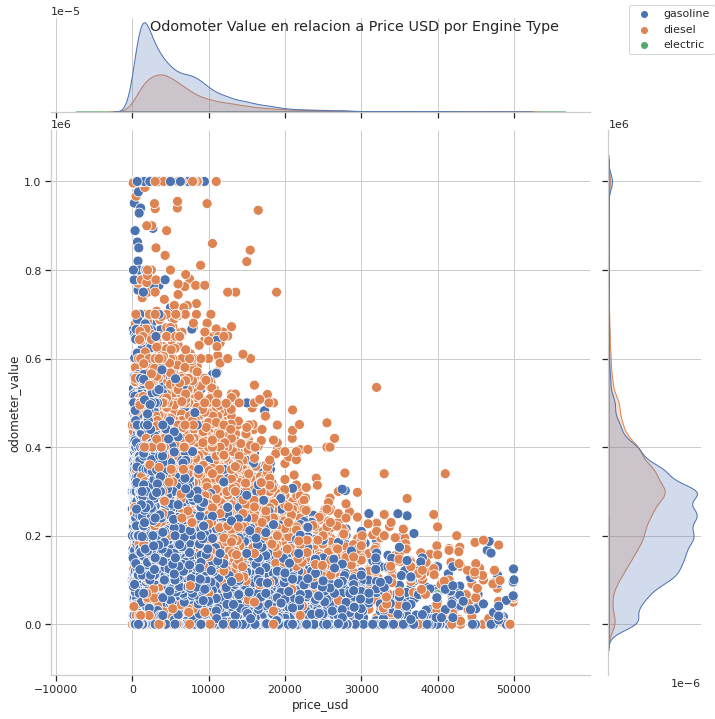

In [59]:
p = sns.jointplot(data=df, x="price_usd", y="odometer_value", hue='engine_type', kind="scatter",height=10,s=100)
p.fig.suptitle("Odomoter Value en relacion a Price USD por Engine Type")
#omito la legenda default
p.ax_joint.legend_._visible=False
p.fig.legend(bbox_to_anchor=(1, 1), loc=1)

Desde el punto de vista de cada variable, en el caso de los vehiculos Diesel podemos observar que existe una mayor concetracion de valores mas altos en kilometraje (odometer_value) a diferencia de los de gasolina.

Con respecto al precio, los autos con motor tipo Diesel tienen un precio superior a los de gasolina.

Con respecto a los electricos, al tratarse de una proporcion muy pequeña, no se llegan a visualizar en el grafico.

In [60]:
#grafico 3dimenseiones 
fig = px.scatter_3d(df, x="price_usd", y="odometer_value", z='engine_type',
              color='engine_type', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Grafico 3D en relacion price_usd, odometer_value y engine_type",
        'y':0.9,
        'x':0.05
         })
fig.show()

Para poder visualizar mejor los autos electricos, decidimos hacer un grafico en 3D.

Aca mismo podemos observar que estos mismos tienen bajo kilometraje y alto costo en comparacion de los demas vehiculos y su kilometraje.

Text(0.5, 1.01, 'Graficos de dispersion de para el dataset de cars')

<Figure size 1152x720 with 0 Axes>

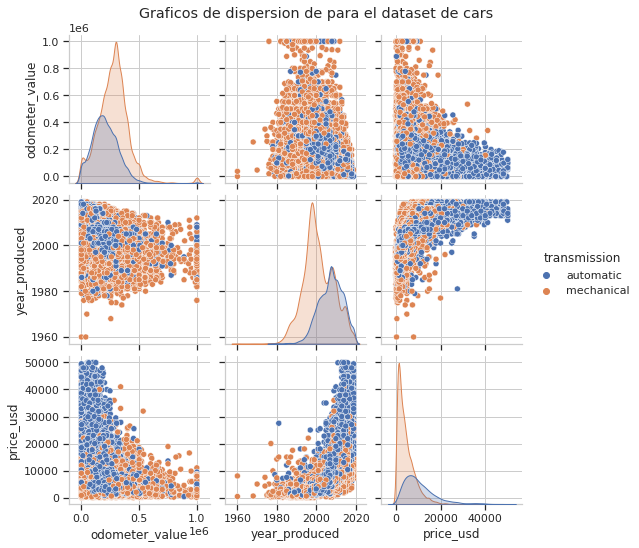

In [61]:
plt.figure(figsize=(16, 10))
g = sns.pairplot(df[['odometer_value', 'year_produced', 'price_usd','transmission']],diag_kind='kde',hue="transmission")
g.fig.suptitle("Graficos de dispersion de para el dataset de cars", y=1.01)

**Odometer_Value/price_usd**: Vemos que hay una mayor concentracion para autos del tipo mecanicos, que se agrupan en valores mas altos de kilometraje que los de automaticos ya que los estos ultimos salieron en años posteriores.
Se evidencia que son mas costosos.

**Year_produced/price_usd**: Los autos mecanicos fueron los primeros en construirse, por eso podemos ver una gran concentracion de valores en años anteriores con respecto a los automaticos.
Podemos observar que los vehiculos automaticos suelen tener un precio superior a los mecanicos, ya que suelen ser de años mas recientes.

Text(0.5, 1.01, 'Graficos de dispersion de para el dataset de cars')

<Figure size 1152x720 with 0 Axes>

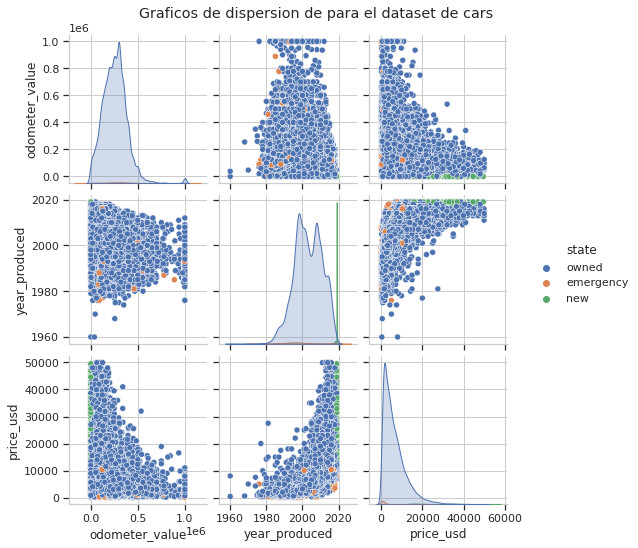

In [62]:
plt.figure(figsize=(16, 10))
g = sns.pairplot(df[['odometer_value', 'year_produced', 'price_usd','state']],diag_kind='kde',hue="state")
g.fig.suptitle("Graficos de dispersion de para el dataset de cars", y=1.01)

Se evidencia que hay una desproporcion de autos con estado owned (usado) respecto a los otros estados(new, emergency).

**Odometer_value/price_usd**: Los autos con estado new, no tienen kilometraje y en el caso de los usados podemos observar que el precio disminuye a medida que aumenta el kilometraje.

**Year_produced/price_usd**: Los autos nuevos se ubican en distintos rangos de precios segun la gama y se concentran en años recientes. Con respecto a los usados, a medida que incrementa el año, tambien incrementa el precio.

Text(0.5, 1.01, 'Graficos de dispersion de para el dataset de cars')

<Figure size 1152x720 with 0 Axes>

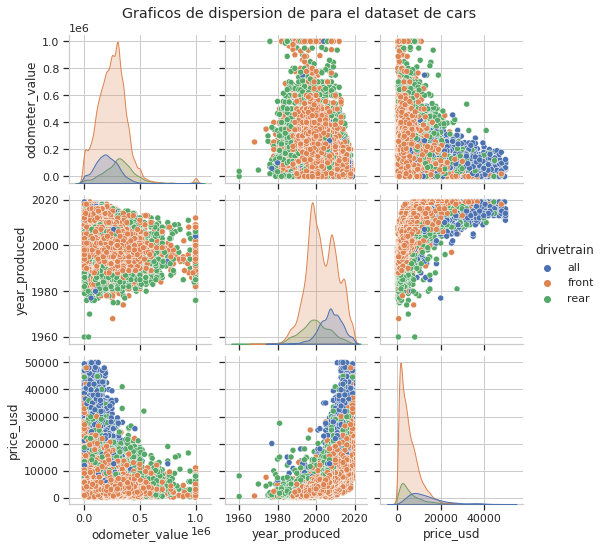

In [63]:
plt.figure(figsize=(16, 10))
g = sns.pairplot(df[['odometer_value', 'year_produced', 'price_usd','drivetrain']],diag_kind='kde',hue="drivetrain")

g.fig.suptitle("Graficos de dispersion de para el dataset de cars", y=1.01)

Se puede ver en el grafico de arriba que los autos con traccion delantera son los que mas predominan.

**Odometer_value/price_usd**: Se puede visualizar que los autos con traccion delantera son los mas comunes del mercado y por ende los mas accesibles, le siguen los de traccion trasera (suelen ser de alta gama) y respecto a traccion integral (all) son los mas costosos debido a que suelen ser camionetas o vehiculos de gran porte.

**Year_produced/price_usd**: Podemos ver que los autos de traccion trasera, se concentran la decada de los 80~90, mientras que los de traccion integral y delantera se concentran en años mas recientes.

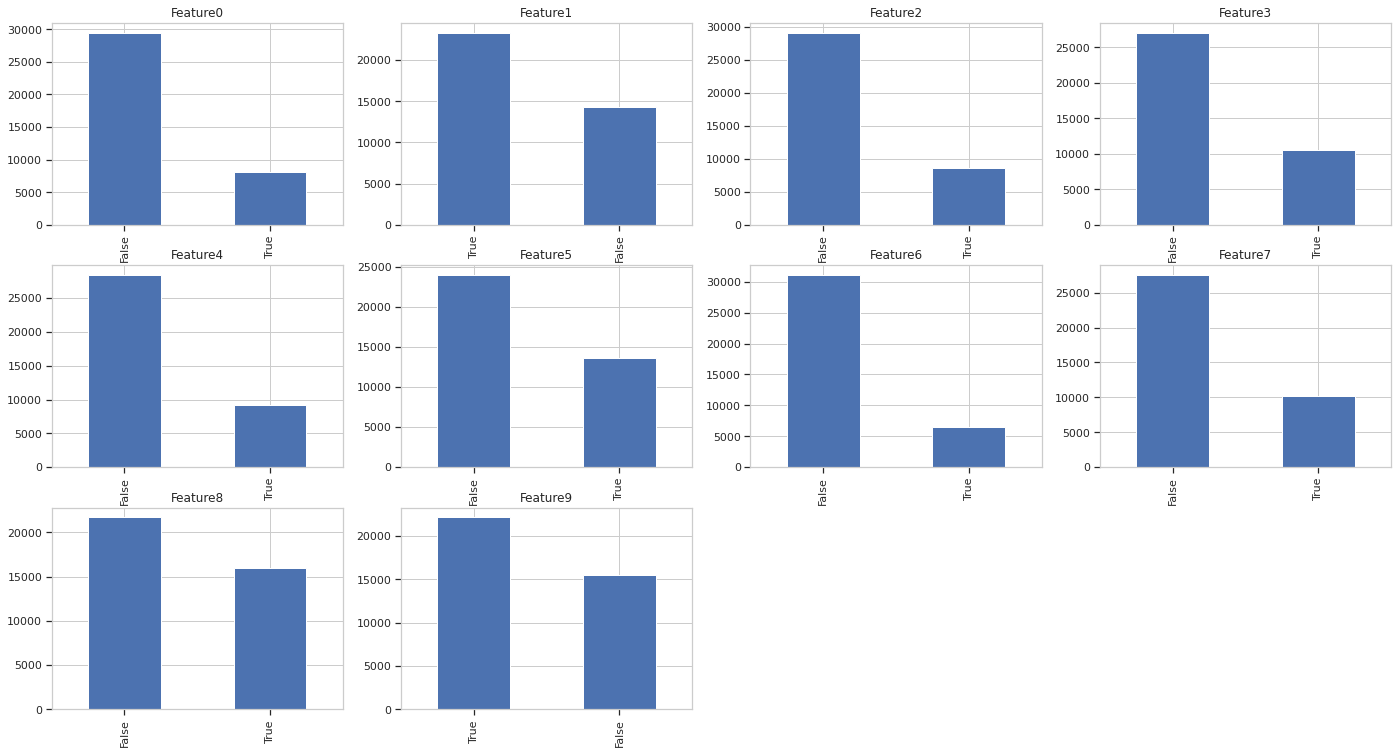

In [64]:
# Set up a grid of plots
fig = plt.figure(figsize=(24,26)) 
fig_dims = (6, 4)


plt.subplot2grid(fig_dims, (0, 0))
df['feature_0'].value_counts().plot(kind='bar', 
                                     title='Feature0')
plt.subplot2grid(fig_dims, (0, 1))
df['feature_1'].value_counts().plot(kind='bar', 
                                     title='Feature1')
plt.subplot2grid(fig_dims, (0, 2))
df['feature_2'].value_counts().plot(kind='bar', 
                                     title='Feature2')
plt.subplot2grid(fig_dims, (0, 3))
df['feature_3'].value_counts().plot(kind='bar', 
                                     title='Feature3')
plt.subplot2grid(fig_dims, (1,0))
df['feature_4'].value_counts().plot(kind='bar', 
                                     title='Feature4')
plt.subplot2grid(fig_dims, (1, 1))
df['feature_5'].value_counts().plot(kind='bar', 
                                     title='Feature5')
plt.subplot2grid(fig_dims, (1, 2))
df['feature_6'].value_counts().plot(kind='bar', 
                                     title='Feature6')
plt.subplot2grid(fig_dims, (1, 3))
df['feature_7'].value_counts().plot(kind='bar', 
                                     title='Feature7')
plt.subplot2grid(fig_dims, (2, 0))
df['feature_8'].value_counts().plot(kind='bar', 
                                     title='Feature8')
plt.subplot2grid(fig_dims, (2, 1))
df['feature_9'].value_counts().plot(kind='bar', 
                                     title='Feature9')

Se puede observar claramente que para las features_1 y las features_9 hay mayor cantidad de valores True.

In [65]:
df['count_features'] = df[['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']].sum(axis=1)
df

manufacturer_name  model_name transmission   color  odometer_value  \
0                Subaru     Outback    automatic  silver          190000   
1                Subaru     Outback    automatic    blue          290000   
2                Subaru    Forester    automatic     red          402000   
3                Subaru     Impreza   mechanical    blue           10000   
4                Subaru      Legacy    automatic   black          280000   
...                 ...         ...          ...     ...             ...   
37674          Chrysler         300    automatic  silver          290000   
37675          Chrysler  PT Cruiser   mechanical    blue          321000   
37676          Chrysler         300    automatic    blue          777957   
37677          Chrysler  PT Cruiser   mechanical   black           20000   
37678          Chrysler     Voyager    automatic  silver          297729   

       year_produced engine_fuel  engine_has_gas engine_type engine_capacity  \
0               2010    gasoline           False    gasoline             2.5   
1               2002    gasoline           False    gasoline             3.0   
2               2001    gasoline           False    gasoline             2.5   
3               1999    gasoline           False    gasoline             3.0   
4               2001    gasoline           False    gasoline             2.5   
...              ...         ...             ...         ...             ...   
37674           2000    gasoline           False    gasoline             3.5   
37675           2004      diesel           False      diesel             2.2   
37676           2000    gasoline           False    gasoline             3.5   
37677           2001    gasoline           False    gasoline             2.0   
37678           2000    gasoline           False    gasoline             2.4   

       ... feature_2  feature_3 feature_4 feature_5  feature_6  feature_7  \
0      ...      True       True     False      True      False       True   
1      ...     False      False      True      True      False      False   
2      ...     False      False     False     False      False      False   
3      ...     False      False     False     False      False      False   
4      ...     False       True      True     False      False      False   
...    ...       ...        ...       ...       ...        ...        ...   
37674  ...     False      False      True      True      False      False   
37675  ...     False      False      True      True      False      False   
37676  ...     False      False      True      True      False      False   
37677  ...     False      False     False     False      False      False   
37678  ...     False      False     False     False      False      False   

      feature_8  feature_9  duration_listed  count_features  
0          True       True               16               7  
1         False       True               83               4  
2          True       True              151               3  
3         False      False               86               1  
4         False       True                7               4  
...         ...        ...              ...             ...  
37674      True       True              301               5  
37675      True       True              317               5  
37676      True       True              369               5  
37677     False       True              490               2  
37678     False       True              632               1  

[37679 rows x 31 columns]

Decidimos sumar la cantidad de features, con valor True, para poder analizar cuantas de estas tienen los vehiculos en el dataset.

In [66]:
fig = px.scatter(df, x="price_usd", y="count_features",color="transmission",title="Cantidad de Features en relacion a Price USD por tipo de Transmision")
fig.show()

Se evidencia que a medida que los vehiculos incluyen mas features (opcionales) va aumentando su precio y aumentan la cantidad los autos de transmision automatica.

Podemos observar que el feature_1 no se comporta como el resto de los features, dandonos a entender es algo basico que casi todos los autos tienen, independientemente del valor.

In [67]:
feature_group = df.groupby(['year_produced','transmission']).mean()[['count_features']]
feature_group

count_features
year_produced transmission                
1960          mechanical          1.000000
1968          mechanical          1.000000
1970          mechanical          1.000000
1974          mechanical          1.000000
1975          mechanical          1.000000
...                                    ...
2017          mechanical          3.680272
2018          automatic           6.654088
              mechanical          4.637168
2019          automatic           1.930070
              mechanical          1.809278

[91 rows x 1 columns]

In [68]:
fig = px.scatter(feature_group.reset_index(), x="year_produced", y="count_features",color="transmission", title="Cantidad de Features en relacion al Año de Fabricacion por tipo de Transmision")
fig.show()

Podemos observar que a medida que pasan los años, aumenta la cantidad de features que puede llegar a incluir un auto.

Los automaticos empezaron a incorporar mas features en comparacion a los mecanicos en la decada de los 80. Esto podria deberse a que en un principio las transmisiones automaticas se ofrecian en los modelos topes de gama.

In [69]:
fig = px.violin(df, x="state", y="body_type",color="drivetrain", title="Body Type en relacion a Estado del Auto por Drivetrain")
fig.show()

Como se puede observar en el grafico, los suv independientemente del estado, la mayor cantidad se concentra en traccion integral.

Con respecto a los vehiculos con traccion delantera, la mayor concentracion se encuentra en sedan y hatchback en cuanto a los usados y emergency. En cambio para los new, la mayor concentracion se encuentra en sedan.

Se evidencia que para los new, hay menos oferta de body_type para las diferentes tracciones.

In [70]:
fig = px.box(df, x="has_warranty", y="price_usd", color="engine_type",title="Price USD en relacion a la Garantia por Tipo de Combustible")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Los autos con garantia son mucho mas costosos que aquellos que no la tienen, lo cual era de esperarse. Los autos tipo diesel son mas caros que los de gasolina.

Se observa que no existen garantias para los autos electricos.

Para los autos sin garantia podemos ver que el precio no varia demasiado entre los tipos de autos.

In [71]:
fig = px.scatter(df, x="odometer_value", y="year_produced",color='is_exchangeable', title="Año de Produccion en relacion al Kilometraje por Tipo de Venta (Permuta o Sin Permuta)")
fig.show()

Podemos observar que cuantos mas años y menos kilometraje hay, se presencia mas cantidad de autos no permutables. Podrian tratarse de autos coleccionables

In [72]:
fig = px.scatter(df, x="odometer_value", y="year_produced",color='engine_has_gas', title="Año de Produccion en relacion al Kilometraje por Tipo de Combustible")
fig.show()

La proporcion de autos con gas es menor que se puede observar claramente en el grafico y ademas visualizamos que a partir de la decada del 80 se comienzan a utilizar estos tipos de vehiculos con conversion a gas.

In [73]:
df_new = df.drop(columns=['up_counter', 'duration_listed','number_of_photos'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37679 entries, 0 to 37678
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  37679 non-null  object 
 1   model_name         37679 non-null  object 
 2   transmission       37679 non-null  object 
 3   color              37679 non-null  object 
 4   odometer_value     37679 non-null  int64  
 5   year_produced      37679 non-null  int64  
 6   engine_fuel        37679 non-null  object 
 7   engine_has_gas     37679 non-null  bool   
 8   engine_type        37679 non-null  object 
 9   engine_capacity    37679 non-null  object 
 10  body_type          37679 non-null  object 
 11  has_warranty       37679 non-null  bool   
 12  state              37679 non-null  object 
 13  drivetrain         37679 non-null  object 
 14  price_usd          37679 non-null  float64
 15  is_exchangeable    37679 non-null  bool   
 16  location_region    376

En base al análisis exhaustivo realizado de las variables, consideramos que las variables "up_counter", "number_of_photos" y "duration_listed" no muestran una correlación significativa con nuestra variable target en estudio (price_usd), por lo que decidimos eliminarlas del dataset final a utilizar.

In [74]:
df_new["car_id"] = df_new.index + 1
df_new.set_index('car_id', inplace=True)
df_new.head()

manufacturer_name model_name transmission   color  odometer_value  \
car_id                                                                     
1                 Subaru    Outback    automatic  silver          190000   
2                 Subaru    Outback    automatic    blue          290000   
3                 Subaru   Forester    automatic     red          402000   
4                 Subaru    Impreza   mechanical    blue           10000   
5                 Subaru     Legacy    automatic   black          280000   

        year_produced engine_fuel  engine_has_gas engine_type engine_capacity  \
car_id                                                                          
1                2010    gasoline           False    gasoline             2.5   
2                2002    gasoline           False    gasoline             3.0   
3                2001    gasoline           False    gasoline             2.5   
4                1999    gasoline           False    gasoline             3.0   
5                2001    gasoline           False    gasoline             2.5   

        ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
car_id  ...                                                                  
1       ...      True       True      True     False       True      False   
2       ...      True      False     False      True       True      False   
3       ...      True      False     False     False      False      False   
4       ...     False      False     False     False      False      False   
5       ...      True      False      True      True      False      False   

       feature_7  feature_8  feature_9  count_features  
car_id                                                  
1           True       True       True               7  
2          False      False       True               4  
3          False       True       True               3  
4          False      False      False               1  
5          False      False       True               4  

[5 rows x 28 columns]

Decidimos crear un índice llamado car_id, tomando como referencia el índice "interno" creado por python

#Modelos de entrenamiento

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Antes de entrenar, necesitamos pasar las variables categorias a numericas, para eso vamos a utilizar label encoder.

In [76]:
df_new_enc = df_new.copy() # copia df
df_new_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37679 entries, 1 to 37679
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  37679 non-null  object 
 1   model_name         37679 non-null  object 
 2   transmission       37679 non-null  object 
 3   color              37679 non-null  object 
 4   odometer_value     37679 non-null  int64  
 5   year_produced      37679 non-null  int64  
 6   engine_fuel        37679 non-null  object 
 7   engine_has_gas     37679 non-null  bool   
 8   engine_type        37679 non-null  object 
 9   engine_capacity    37679 non-null  object 
 10  body_type          37679 non-null  object 
 11  has_warranty       37679 non-null  bool   
 12  state              37679 non-null  object 
 13  drivetrain         37679 non-null  object 
 14  price_usd          37679 non-null  float64
 15  is_exchangeable    37679 non-null  bool   
 16  location_region    376

In [77]:
#Metodo de encoding a utilizar: label encoder
def lbl_encoding(df):
  lb_encoders = [] # for saving all encoders
  catg_cols = [i for i in df.columns if df[i].dtype=="object" or df[i].dtype=="bool" ]
  for i in catg_cols:
    lb_encoder = LabelEncoder()
    col = df[i]
    encoded_col = lb_encoder.fit_transform(col)
    df[i] = encoded_col
    lb_encoders.append(lb_encoder)

  return df


In [78]:
#df_new_enc va a ser el dataset con encoding al que luego le vamos a quitar las columnas con menos relevancia en el modelo
df_new_enc=lbl_encoding(df)
df_new_enc

manufacturer_name  model_name  transmission  color  odometer_value  \
0                     45         691             0      8          190000   
1                     45         691             0      1          290000   
2                     45         448             0      7          402000   
3                     45         536             1      1           10000   
4                     45         592             0      0          280000   
...                  ...         ...           ...    ...             ...   
37674                  8          47             0      8          290000   
37675                  8         693             1      1          321000   
37676                  8          47             0      1          777957   
37677                  8         693             1      0           20000   
37678                  8         984             0      8          297729   

       year_produced  engine_fuel  engine_has_gas  engine_type  \
0               2010            3               0            2   
1               2002            3               0            2   
2               2001            3               0            2   
3               1999            3               0            2   
4               2001            3               0            2   
...              ...          ...             ...          ...   
37674           2000            3               0            2   
37675           2004            0               0            0   
37676           2000            3               0            2   
37677           2001            3               0            2   
37678           2000            3               0            2   

       engine_capacity  ...  feature_2  feature_3  feature_4  feature_5  \
0                   19  ...          1          1          0          1   
1                   24  ...          0          0          1          1   
2                   19  ...          0          0          0          0   
3                   24  ...          0          0          0          0   
4                   19  ...          0          1          1          0   
...                ...  ...        ...        ...        ...        ...   
37674               29  ...          0          0          1          1   
37675               16  ...          0          0          1          1   
37676               29  ...          0          0          1          1   
37677               14  ...          0          0          0          0   
37678               18  ...          0          0          0          0   

       feature_6  feature_7  feature_8  feature_9  duration_listed  \
0              0          1          1          1               16   
1              0          0          0          1               83   
2              0          0          1          1              151   
3              0          0          0          0               86   
4              0          0          0          1                7   
...          ...        ...        ...        ...              ...   
37674          0          0          1          1              301   
37675          0          0          1          1              317   
37676          0          0          1          1              369   
37677          0          0          0          1              490   
37678          0          0          0          1              632   

       count_features  
0                   7  
1                   4  
2                   3  
3                   1  
4                   4  
...               ...  
37674               5  
37675               5  
37676               5  
37677               2  
37678               1  

[37679 rows x 31 columns]

In [79]:
#df_new_enc_full va a ser el dataset con encoding al cual solo restariamos las columnas que no aplican valor al modelo.
#Filtramos los años mayores a 1990 porque previo a eso hay varios outliers
df_new_enc_full = df_new_enc.copy()
df_new_enc_full=df_new_enc_full[df_new_enc_full['year_produced'] > 1990]
df_new_enc_full

manufacturer_name  model_name  transmission  color  odometer_value  \
0                     45         691             0      8          190000   
1                     45         691             0      1          290000   
2                     45         448             0      7          402000   
3                     45         536             1      1           10000   
4                     45         592             0      0          280000   
...                  ...         ...           ...    ...             ...   
37674                  8          47             0      8          290000   
37675                  8         693             1      1          321000   
37676                  8          47             0      1          777957   
37677                  8         693             1      0           20000   
37678                  8         984             0      8          297729   

       year_produced  engine_fuel  engine_has_gas  engine_type  \
0               2010            3               0            2   
1               2002            3               0            2   
2               2001            3               0            2   
3               1999            3               0            2   
4               2001            3               0            2   
...              ...          ...             ...          ...   
37674           2000            3               0            2   
37675           2004            0               0            0   
37676           2000            3               0            2   
37677           2001            3               0            2   
37678           2000            3               0            2   

       engine_capacity  ...  feature_2  feature_3  feature_4  feature_5  \
0                   19  ...          1          1          0          1   
1                   24  ...          0          0          1          1   
2                   19  ...          0          0          0          0   
3                   24  ...          0          0          0          0   
4                   19  ...          0          1          1          0   
...                ...  ...        ...        ...        ...        ...   
37674               29  ...          0          0          1          1   
37675               16  ...          0          0          1          1   
37676               29  ...          0          0          1          1   
37677               14  ...          0          0          0          0   
37678               18  ...          0          0          0          0   

       feature_6  feature_7  feature_8  feature_9  duration_listed  \
0              0          1          1          1               16   
1              0          0          0          1               83   
2              0          0          1          1              151   
3              0          0          0          0               86   
4              0          0          0          1                7   
...          ...        ...        ...        ...              ...   
37674          0          0          1          1              301   
37675          0          0          1          1              317   
37676          0          0          1          1              369   
37677          0          0          0          1              490   
37678          0          0          0          1              632   

       count_features  
0                   7  
1                   4  
2                   3  
3                   1  
4                   4  
...               ...  
37674               5  
37675               5  
37676               5  
37677               2  
37678               1  

[35836 rows x 31 columns]

Con las nuevas variables categoricas, transformadas en numericas, volvemos a hacer una nueva tabla de correlación con todas las variables.

In [80]:
#volvemos a calcular la correlación ahora que todas las variables son numéricas
cols = [i for i in df_new_enc.columns   if df_new_enc[i].dtype!="object" and df_new_enc[i].dtype!="bool"] #va a tomar todas las columnas porque ya las pasamos a numéricas
corr = df_new_enc[cols].corr('spearman')
corr

manufacturer_name  model_name  transmission     color  \
manufacturer_name           1.000000    0.273132      0.132908  0.043725   
model_name                  0.273132    1.000000     -0.028852  0.043866   
transmission                0.132908   -0.028852      1.000000  0.112034   
color                       0.043725    0.043866      0.112034  1.000000   
odometer_value             -0.028323   -0.053154      0.275439  0.035737   
year_produced               0.044594    0.120963     -0.398316 -0.046861   
engine_fuel                -0.054060   -0.108408     -0.149736 -0.052956   
engine_has_gas             -0.032007    0.013773     -0.020871  0.006988   
engine_type                -0.062277   -0.106202     -0.146243 -0.051341   
engine_capacity            -0.205544    0.063928     -0.375457 -0.081989   
body_type                  -0.035094    0.037636     -0.140452 -0.030616   
has_warranty                0.099007    0.057866     -0.064592 -0.006805   
state                      -0.064381   -0.036857      0.029459  0.001516   
drivetrain                 -0.080353   -0.190681      0.227202  0.058524   
price_usd                   0.008360    0.135357     -0.497657 -0.081355   
is_exchangeable            -0.031712   -0.006002     -0.025054 -0.007481   
location_region             0.011549    0.014124     -0.023381  0.002712   
number_of_photos           -0.005067    0.026695     -0.192425 -0.046088   
up_counter                 -0.035515    0.008617     -0.104986 -0.003729   
feature_0                   0.063455    0.020602      0.239578  0.093419   
feature_1                  -0.042180    0.014493     -0.267841 -0.071803   
feature_2                  -0.145939   -0.020424     -0.366602 -0.118915   
feature_3                  -0.087654    0.019171     -0.403186 -0.108970   
feature_4                  -0.155746   -0.012311     -0.439455 -0.139784   
feature_5                  -0.049077    0.033408     -0.437521 -0.128061   
feature_6                  -0.082581    0.033495     -0.336110 -0.102659   
feature_7                  -0.063977    0.033255     -0.362503 -0.091531   
feature_8                  -0.056412    0.007416     -0.398242 -0.106617   
feature_9                  -0.097984   -0.039692     -0.323979 -0.128536   
duration_listed            -0.029219    0.002751     -0.032643  0.008278   
count_features             -0.107685    0.007643     -0.519810 -0.156007   

                   odometer_value  year_produced  engine_fuel  engine_has_gas  \
manufacturer_name       -0.028323       0.044594    -0.054060       -0.032007   
model_name              -0.053154       0.120963    -0.108408        0.013773   
transmission             0.275439      -0.398316    -0.149736       -0.020871   
color                    0.035737      -0.046861    -0.052956        0.006988   
odometer_value           1.000000      -0.615880    -0.285796        0.071467   
year_produced           -0.615880       1.000000     0.022754       -0.083015   
engine_fuel             -0.285796       0.022754     1.000000       -0.108872   
engine_has_gas           0.071467      -0.083015    -0.108872        1.000000   
engine_type             -0.265160      -0.003983     0.964719        0.136064   
engine_capacity          0.221062      -0.076229    -0.246447        0.072063   
body_type                0.038421       0.089003    -0.155307        0.022023   
has_warranty            -0.181274       0.183737     0.054168       -0.020713   
state                    0.128411      -0.088249    -0.053322        0.015431   
drivetrain               0.227020      -0.273302    -0.060274       -0.019652   
price_usd               -0.492272       0.868019    -0.087976       -0.066304   
is_exchangeable          0.048447      -0.073598    -0.003247        0.019307   
location_region         -0.050429       0.049227     0.043431       -0.033646   
number_of_photos        -0.162381       0.275405     0.004469       -0.034082   
up_counter              -0.023120       0.07515

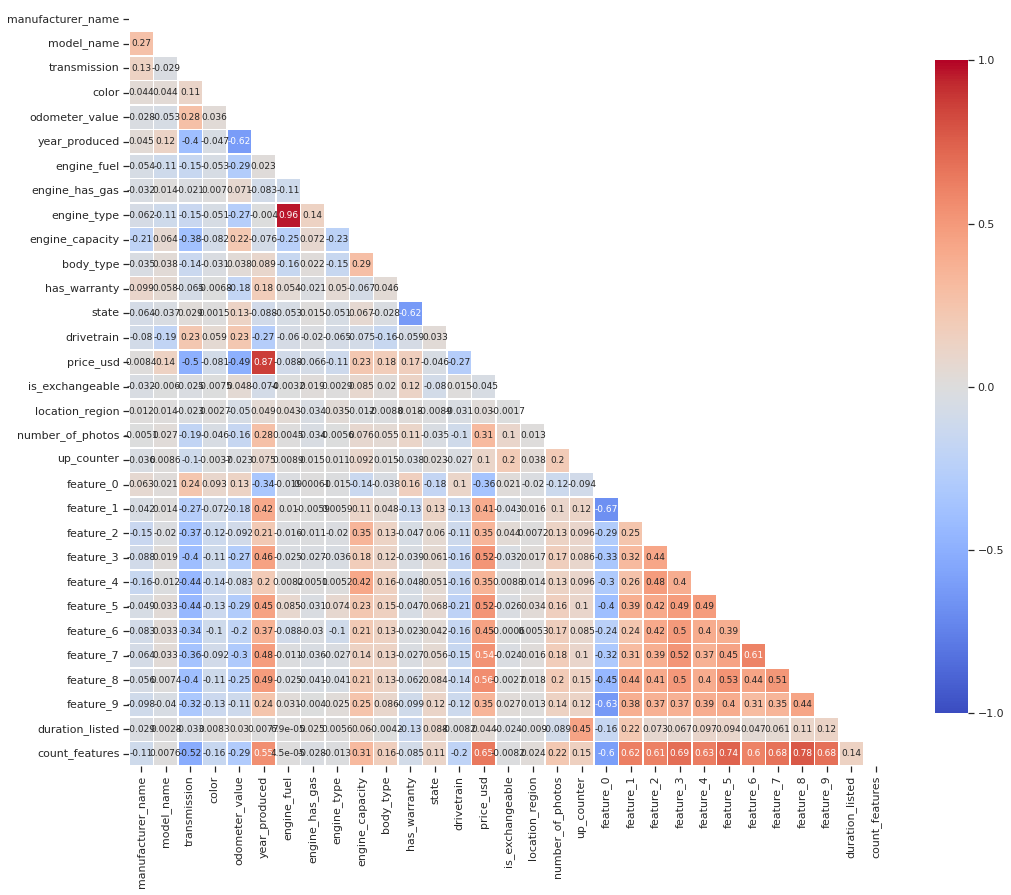

In [81]:
#graficamos las correlaciones ahora con todas las variables ya transformadas a numéricas
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(17, 20)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .6, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 9})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [82]:
#tomamos en cuenta unicamente aquellas variables con correlación fuerte (0.6)
low_corr_features  = [col for col in corr.index if abs(corr["price_usd"][col]) < 0.6]
low_corr_features

['manufacturer_name',
 'model_name',
 'transmission',
 'color',
 'odometer_value',
 'engine_fuel',
 'engine_has_gas',
 'engine_type',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'state',
 'drivetrain',
 'is_exchangeable',
 'location_region',
 'number_of_photos',
 'up_counter',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'duration_listed']

In [83]:
df_new_enc.drop(columns = low_corr_features,inplace = True)

In [84]:
df_new_enc

year_produced  price_usd  count_features
0               2010    10900.0               7
1               2002     5000.0               4
2               2001     2800.0               3
3               1999     9999.0               1
4               2001     2134.0               4
...              ...        ...             ...
37674           2000     2750.0               5
37675           2004     4800.0               5
37676           2000     4300.0               5
37677           2001     4000.0               2
37678           2000     3200.0               1

[37679 rows x 3 columns]

Con las nuevas relaciones, decidimos usar aquellas columnas que tengan una relacion fuerte, mayor a 0.6.

Nos queda solamente las columnas year_produced, count_Features

Decidimos analizar la relacion entre year_produced y price_usd

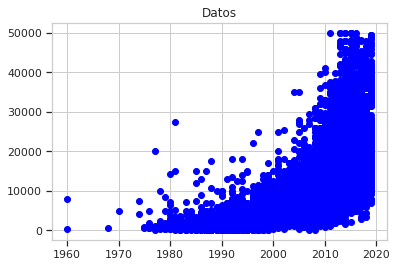

In [85]:
# hacemos un gráfico de los datos que hemos generado
x = df_new_enc['year_produced']
y = df_new_enc['price_usd']

plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');
#print(example_function.__doc__)

In [86]:
#calculamos el coeficiente de correlación entre las variables price_usd y year_produced
corr_test = spearmanr(a = x, b =  y)
print("Coeficiente de correlación de Spearman entre year_produced y price_usd: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Spearman entre year_produced y price_usd:  0.8680190656949246
P-value:  0.0


Decidimos analizar la relacion entre count_features y price_usd

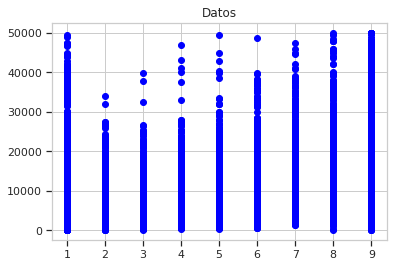

In [87]:
x = df_new_enc['count_features']
y = df_new_enc['price_usd']

plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');
#print(example_function.__doc__)

In [88]:
#calculamos el coeficiente de correlación entre las variables price_usd y count_features
corr_test = spearmanr(a = x, b =  y)
print("Coeficiente de correlación de Spearman entre count_features y price_usd: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Spearman entre count_features y price_usd:  0.6527700512159659
P-value:  0.0


##Modelo de Regresión Lineal

###Price_usd vs Year_produced

In [89]:
#Modelo price_usd & year_produced
Y = df_new_enc['price_usd']
X = df_new_enc['year_produced']

X_train = sm.add_constant(X, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [90]:
#vamos a entrenar utilizando la variable year_produced
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)
# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [91]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.523
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                          3.096e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:18   Log-Likelihood:                     -2.8812e+05
No. Observations:               28259   AIC:                                  5.762e+05
Df Residuals:                   28258   BIC:                                  5.762e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [92]:
r2 = modelo.rsquared
print(f"el R2 score entre year_produced y price_usd es de: {r2}")

el R2 score entre year_produced y price_usd es de: 0.5227889486309651


###Price_usd vs Count_features

In [93]:
#Modelo price_usd & count_features
Y = df_new_enc['price_usd']
X = df_new_enc['count_features']

X_train = sm.add_constant(X, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [94]:
#vamos a entrenar utilizando la variable count_features
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [95]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                          5.415e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:18   Log-Likelihood:                     -2.8345e+05
No. Observations:               28259   AIC:                                  5.669e+05
Df Residuals:                   28258   BIC:                                  5.669e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [96]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.657107381149297


Como conclusión inicial, podemos observar que la variable count_features predice mejor el precio que la variable year_produced (r-squared 0.66 >0.52)

Iniciamos la prediccion con el ultimo modelo entrenado, price_usd vs count_features, el cual obtuvo mejores resultados en el entrenamiento.

In [97]:
#con el modelo entrenado de count features y price_usd pasamos al test
predict=modelo.predict(X_test)

In [98]:
print('Actual values', list(Y_test.ravel()))#ravel aplana los datos
print('Predictions :', list(predict.ravel()))

Actual values [2000.0, 2800.0, 1500.0, 2000.0, 1390.0, 18300.0, 3500.0, 8800.0, 8200.0, 15450.0, 2999.0, 2500.0, 900.0, 300.0, 550.0, 7500.0, 3100.0, 507.0, 6300.0, 3300.0, 2700.0, 4300.0, 4505.0, 12615.0, 3150.0, 3900.0, 9000.0, 11800.0, 1900.0, 3800.0, 7200.0, 950.0, 8200.0, 1200.0, 10200.0, 13900.0, 4000.0, 3500.0, 999.0, 5400.0, 11900.0, 1200.0, 2300.0, 3200.0, 5000.0, 4200.0, 6100.0, 1999.0, 7900.0, 2300.0, 14500.0, 11950.0, 3000.0, 4700.0, 2500.0, 900.0, 7000.0, 16850.0, 15500.0, 2561.0, 1100.0, 5750.0, 7300.0, 10950.0, 379.0, 2000.0, 12500.0, 2700.0, 8200.0, 7500.0, 1750.0, 1900.0, 750.0, 8800.0, 5850.0, 3700.0, 7000.0, 11100.0, 3600.0, 3800.0, 11120.0, 14200.0, 5000.0, 13800.0, 950.0, 6200.0, 1000.0, 4000.0, 750.0, 500.0, 250.0, 10765.0, 3000.0, 8200.0, 2000.0, 6000.0, 5700.0, 6000.0, 5500.0, 4999.0, 17499.0, 5500.0, 7450.0, 4600.0, 4600.0, 1900.0, 8700.0, 2200.0, 7500.0, 2300.0, 6700.0, 3600.0, 8000.0, 6400.0, 9800.0, 9200.0, 555.0, 3100.0, 1500.0, 14000.0, 6999.0, 2650.0, 760

In [99]:
print(f"r2 score: {sklearn.metrics.r2_score(Y_test,predict)}")
print(f"mean squared error: {round(mean_squared_error(Y_test,predict),2)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,predict)}")

r2 score: 0.3074039463993756
mean squared error: 27255640.98
mean absolute error: 3226.81335344066


Al ser un algoritmo de regresion, obtenemos el r2 para ver cuan buena fue la prediccion. En este caso vemos que el resultado no es nada bueno, ya que esta muy bajo el valor.

##Regresión Lineal Multiple

Hacemos un modelo con ambas variables (price_usd vs count_Features y year_produced)

In [100]:
Y_mult = df_new_enc['price_usd']
X_mult = df_new_enc.drop('price_usd',axis=1)

X_train_mult = sm.add_constant(X_mult, prepend=True)
#X_test_mult = sm.add_constant(X_mult, prepend=True)

X_train_mult, X_test_mult, Y_train_mult, Y_test_mult = train_test_split(X_mult, Y_mult, random_state=50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [101]:
#vamos a entrenar utilizando la variable count_features
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train_mult, exog=X_train_mult)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [102]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                          2.909e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:18   Log-Likelihood:                     -2.8277e+05
No. Observations:               28259   AIC:                                  5.656e+05
Df Residuals:                   28257   BIC:                                  5.656e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [103]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.6731062855254313


In [104]:
#con el modelo entrenado de count features y price_usd pasamos al test
predict_mult=modelo.predict(X_test_mult)

In [105]:
print('Actual values', list(Y_test_mult.ravel()))#ravel aplana los datos
print('Predictions :', list(predict_mult.ravel()))

Actual values [2000.0, 2800.0, 1500.0, 2000.0, 1390.0, 18300.0, 3500.0, 8800.0, 8200.0, 15450.0, 2999.0, 2500.0, 900.0, 300.0, 550.0, 7500.0, 3100.0, 507.0, 6300.0, 3300.0, 2700.0, 4300.0, 4505.0, 12615.0, 3150.0, 3900.0, 9000.0, 11800.0, 1900.0, 3800.0, 7200.0, 950.0, 8200.0, 1200.0, 10200.0, 13900.0, 4000.0, 3500.0, 999.0, 5400.0, 11900.0, 1200.0, 2300.0, 3200.0, 5000.0, 4200.0, 6100.0, 1999.0, 7900.0, 2300.0, 14500.0, 11950.0, 3000.0, 4700.0, 2500.0, 900.0, 7000.0, 16850.0, 15500.0, 2561.0, 1100.0, 5750.0, 7300.0, 10950.0, 379.0, 2000.0, 12500.0, 2700.0, 8200.0, 7500.0, 1750.0, 1900.0, 750.0, 8800.0, 5850.0, 3700.0, 7000.0, 11100.0, 3600.0, 3800.0, 11120.0, 14200.0, 5000.0, 13800.0, 950.0, 6200.0, 1000.0, 4000.0, 750.0, 500.0, 250.0, 10765.0, 3000.0, 8200.0, 2000.0, 6000.0, 5700.0, 6000.0, 5500.0, 4999.0, 17499.0, 5500.0, 7450.0, 4600.0, 4600.0, 1900.0, 8700.0, 2200.0, 7500.0, 2300.0, 6700.0, 3600.0, 8000.0, 6400.0, 9800.0, 9200.0, 555.0, 3100.0, 1500.0, 14000.0, 6999.0, 2650.0, 760

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"r2 score: {sklearn.metrics.r2_score(Y_test_mult,predict_mult)}")
print(f"mean squared error: {mean_squared_error(Y_test_mult,predict_mult)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,predict_mult)}")

r2 score: 0.34012960035570994
mean squared error: 25967792.64528954
mean absolute error: 3353.363889155923


Podemos ver que al realizar la regresión lineal multiple (que en realidad toma en cuenta las variables price_usd, year_produced y count_features) la prediccion es bastante similar a la predicción de la regresión lineal simple y el r2 aún sigue siendo bajo.

 - r2 score count_Features vs price_usd: 0.34012960035570994
 - mean squared error count_Features vs price_usd: 25967792.64528954

##Regresion Lineal Multiple con Normalización Logarítmica

In [107]:
#functions

def distribution_with_log(column):

    f = plt.figure(figsize = (15,6)) # genera el lienzo
    ax = f.add_subplot(121) # ubica el grafico en 1= row, 2 cantidad de columnas y 1 la ubicacion del grafico
    sns.distplot(df_new_enc_filt[column], bins = 50, color ='r', ax = ax)
    ax.set_title('distribution of '+ column)
#    if column != 'children':
    ax = f.add_subplot(122)
    sns.distplot(np.log10(df_new_enc_filt[column]), bins = 40, color ='b', ax = ax)
    ax.set_title('log plot distribution of '+ column)
    ax.set_xscale('log');


def plot_compare(x, y, df):

  f = plt.figure(figsize = (15,6))
  ax = f.add_subplot(121)

#  if x in ('age', 'bmi'):
  sns.scatterplot(data=df, x=x,y=y, ax=ax)
#  else:
#    sns.boxplot(x= x, y= y, data=df)


def model_train_example(columns,target,df):

  X = df[columns] # input variable
  y = df[target] ## the output variables, la que deseamos predecir
  X = sm.add_constant(X) ## se agrega una constante necesaria para poder entrenar en regresion

  model_trained = sm.OLS(y, X).fit()
  
  # Print out the statistics
  print(model_trained.summary())
  return model_trained
  

Text(0.5, 1.0, 'Grafico de dispersion entre precio de year_produced y  price_usd')

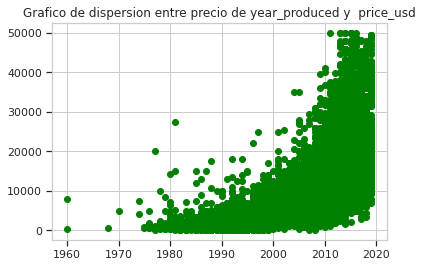

In [108]:
plt.scatter(df_new_enc['year_produced'],df_new_enc['price_usd'],label='data_class', color='green')
plt.title('Grafico de dispersion entre precio de year_produced y  price_usd')

Text(0.5, 1.0, 'Grafico de dispersion segun las variables anteriores pero transformadas')

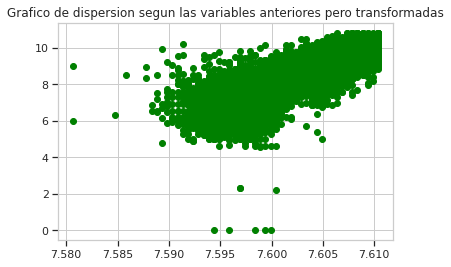

In [109]:
#ya definido que tenemos dos variables que podemos determinar como normales , aunque no pasamos el test de normalizacion

plt.scatter(np.log(df_new_enc['year_produced']),np.log(df_new_enc['price_usd']),label='data_class', color='green')
plt.title('Grafico de dispersion segun las variables anteriores pero transformadas')

Podemos tomar los datos de 1990 en adelante

Text(0.5, 1.0, 'Grafico de dispersion entre precio de count_features y  price_usd')

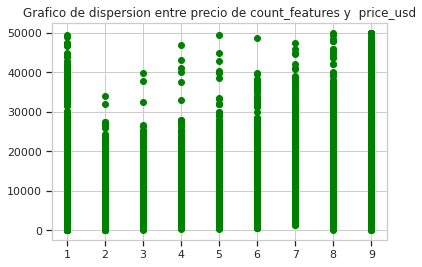

In [110]:
plt.scatter(df_new_enc['count_features'],df_new_enc['price_usd'],label='data_class', color='green')
plt.title('Grafico de dispersion entre precio de count_features y  price_usd')

Text(0.5, 1.0, 'Grafico de dispersion segun las variables anteriores pero transformadas')

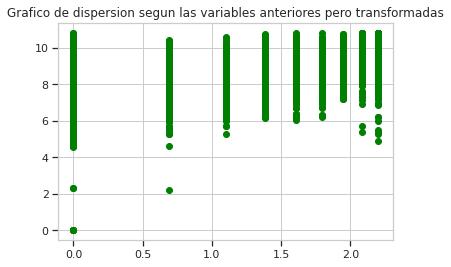

In [111]:
#ya definido que tenemos dos variables que podemos determinar como normales , aunque no pasamos el test de normalizacion
plt.scatter(np.log(df_new_enc['count_features']),np.log(df_new_enc['price_usd']),label='data_class', color='green')
plt.title('Grafico de dispersion segun las variables anteriores pero transformadas')

Filtramos los outliers del año.

Tomamos datos desde 1990 en adelante.

In [112]:
df_new_enc_filt=df_new_enc[df_new_enc['year_produced'] > 1990]

In [113]:
df_new_enc.shape

(37679, 3)

In [114]:
df_new_enc_filt.shape

(35836, 3)

In [115]:
import ipywidgets as widgets #libreria para interaccion del usuario con los graficos
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore') # manera de ocultar los warnings en las celdas

In [116]:
dd = widgets.Dropdown(options=df_new_enc_filt.select_dtypes(include='number').columns,
                 value = 'price_usd')

ui = widgets.HBox([dd])

out = widgets.interactive_output(distribution_with_log, {'column': dd})
display(ui, out)

Output()

Podemos ver que year_produced no hay necesidad de aplicarle una transformacion logaritmica, al igual que count_features.

Sin embargo para el caso de price_usd, la transformacion logaritmica, arroja valores no normales.


In [117]:
df_new_enc_filt['price_usd_log'] = np.log10(df_new_enc_filt['price_usd'])

In [118]:
df_new_enc_filt[df_new_enc_filt.columns[~df_new_enc_filt.columns.isin(['price_usd'])]].corr()['price_usd_log'].sort_values()

count_features    0.609798
year_produced     0.826507
price_usd_log     1.000000
Name: price_usd_log, dtype: float64

No transformamos las variables count_feature ni year_produced, porque no hay una gran mejoria en la correlacion entre price_usd, como se puede ver arriba.

In [119]:
Y_log = df_new_enc_filt['price_usd_log']
#Y_log = df_new_enc_filt['price_usd']
X_log = df_new_enc_filt.drop(['price_usd','price_usd_log'],axis=1)#para que solo queden las columnas year_produced_log y count_features_log

X_train = sm.add_constant(X_log, prepend=True)
#X_test_mult = sm.add_constant(X_mult, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_log, Y_log, random_state=50)

In [120]:
X_log

year_produced  count_features
0               2010               7
1               2002               4
2               2001               3
3               1999               1
4               2001               4
...              ...             ...
37674           2000               5
37675           2004               5
37676           2000               5
37677           2001               2
37678           2000               1

[35836 rows x 2 columns]

In [121]:
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [122]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:          price_usd_log   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.773e+06
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:21   Log-Likelihood:                         -7562.3
No. Observations:               26877   AIC:                                  1.513e+04
Df Residuals:                   26875   BIC:                                  1.515e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [123]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.9924789698152069


Entendemos que debe haber algun problema con el modelo, al obtener un R2 score muy alto.

Empezamos la prediccion con este ultimo modelo

In [124]:
prediction=modelo.predict(X_test)
#prediction=pow(10, modelo.predict(X_test))
#Y_test=pow(10,Y_test)

In [125]:
print('Actual values', list(Y_test.ravel()))#ravel aplana los datos
print('Predictions :', list(prediction.ravel()))

Actual values [3.0211892990699383, 3.934498451243568, 3.4771212547196626, 3.8282731120520697, 3.8195439355418688, 2.9425041061680806, 4.060697840353612, 3.6989700043360187, 3.690196080028514, 4.079181246047625, 3.130333768495006, 3.7558748556724915, 4.077367905284157, 2.7781512503836434, 3.230448921378274, 3.59659709562646, 3.041392685158225, 3.4771212547196626, 3.204119982655925, 3.6532125137753435, 3.3010299956639813, 3.6989700043360187, 3.074084689028244, 4.041392685158225, 2.9030899869919438, 3.2430380486862944, 4.062581984228163, 3.724275869600789, 3.0, 3.173186268412274, 3.934498451243568, 2.3979400086720375, 3.4771212547196626, 3.8976270912904414, 3.8934843462184863, 3.146128035678238, 3.505149978319906, 4.21745762253858, 3.5185139398778875, 3.3710678622717363, 3.6434526764861874, 4.243038048686294, 4.251638220448212, 3.7745169657285498, 4.033423755486949, 3.204119982655925, 2.5728716022004803, 4.027349607774757, 3.6989700043360187, 3.9956351945975497, 3.8260748027008264, 3.9395

In [126]:
print(f"r2 score: {sklearn.metrics.r2_score(Y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(Y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,prediction)}")

r2 score: 0.40461738761123267
mean squared error: 0.10330526855227684
mean absolute error: 0.2427091137160242


In [127]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted'])  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(Y_test)

df_cross=pd.concat([t, p], axis=1 ).round(1)

df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd_log']
df_cross

price_usd_log  price_usd_predicted  diff
14106            3.0                  3.4   0.4
33121            3.9                  3.6  -0.3
36909            3.5                  3.5   0.0
3969             3.8                  3.6  -0.2
1500             3.8                  3.6  -0.2
...              ...                  ...   ...
33500            3.3                  3.4   0.1
35610            3.6                  3.4  -0.2
30176            3.7                  3.8   0.1
19190            4.0                  4.2   0.2
36883            3.6                  3.6   0.0

[8959 rows x 3 columns]

Transformando logaritmicamente la columna price_usd podemos ver una mejoria tanto en el entrenamiento como en la prediccion, aunque esta ultima no es bastance acertada (40%), en comparacion al entrenamiento que da un valor de 0.92 (92%)

Sin la transformacion de las columnas la prediccion era del 34%

¿Por que hay tanta diferencia entre el modelo y la prediccion?

## Modelo de regresión Múltiple con Normalización Scaler

### Standard Scaler sin price_usd

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_std=StandardScaler()

In [129]:
df_new_enc_filt.drop('price_usd_log',axis=1,inplace=True)

In [130]:
df_new_enc_filt_v2 = df_new_enc_filt.copy()
df_new_enc_filt_v2[['count_features','year_produced']] = scaler_std.fit_transform(df_new_enc_filt[['count_features','year_produced']])

In [131]:
Y_sca = df_new_enc_filt_v2['price_usd']
#Y_sca = df_new_enc_filt['price_usd']
X_sca = df_new_enc_filt_v2.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train = sm.add_constant(X_sca, prepend=True)
#X_test_mult = sm.add_constant(X_mult, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_sca, Y_sca, random_state=50)

In [132]:
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [133]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.274
Method:                 Least Squares   F-statistic:                              5067.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:21   Log-Likelihood:                     -2.8020e+05
No. Observations:               26877   AIC:                                  5.604e+05
Df Residuals:                   26875   BIC:                                  5.604e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [134]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.2738433148505083


In [135]:
prediction=modelo.predict(X_test)
#prediction=pow(10, modelo.predict(X_test))
#Y_test=pow(10,Y_test)

In [136]:
print(f"r2 score: {sklearn.metrics.r2_score(Y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(Y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,prediction)}")

r2 score: -0.5969593206204133
mean squared error: 65263738.1249584
mean absolute error: 7003.411217907635


In [137]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted'])  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(Y_test)

df_cross=pd.concat([t, p], axis=1 ).round(1)

df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross

price_usd  price_usd_predicted     diff
14106     1050.0              -6793.7  -7843.7
33121     8600.0               3155.2  -5444.8
36909     3000.0              -2109.7  -5109.7
3969      6734.0               1412.3  -5321.7
1500      6600.0               1993.3  -4606.7
...          ...                  ...      ...
33500     2100.0              -8536.6 -10636.6
35610     3750.0                758.9  -2991.1
30176     5150.0               1484.8  -3665.2
19190    10000.0               8020.3  -1979.7
36883     4400.0                831.3  -3568.7

[8959 rows x 3 columns]

Podemos observar que al utilizar el Standard Scaler como transformación en las variables count_features y year_produced, tanto el entrenamiento como la predicción no mejoran (en comparación a la normalización con logaritmo):
- r2 score: -0.5969593206204133
- mean squared error: 65263738.1249584


### Standard Scaler con todo el dataset

In [138]:
df_new_enc_filt_v3 = df_new_enc_filt.copy()  #hacemos scaler s/todo el dataset

std_scaled = scaler_std.fit_transform(df_new_enc_filt_v3)
std_scaled  = pd.DataFrame ( data = std_scaled, columns =df_new_enc_filt_v3.columns)

In [139]:
Y_sca = std_scaled['price_usd']
#Y_sca = df_new_enc_filt['price_usd']
X_sca = std_scaled.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train = sm.add_constant(X_sca, prepend=True)
#X_test_mult = sm.add_constant(X_mult, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_sca, Y_sca, random_state=50)

In [140]:
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [141]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                          1.981e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:21   Log-Likelihood:                         -26079.
No. Observations:               26877   AIC:                                  5.216e+04
Df Residuals:                   26875   BIC:                                  5.218e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [142]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.5958150803885354


In [143]:
prediction=modelo.predict(X_test)
#prediction=pow(10, modelo.predict(X_test))
#Y_test=pow(10,Y_test)

In [144]:
print(f"r2 score: {sklearn.metrics.r2_score(Y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(Y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,prediction)}")

r2 score: 0.5996219427491318
mean squared error: 0.3899993764733445
mean absolute error: 0.40287466770751545


In [145]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted'])  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(Y_test)

df_cross=pd.concat([t, p], axis=1 ).round(1)

df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross

price_usd  price_usd_predicted  diff
13759       -0.9                 -1.1  -0.2
31528        0.2                  0.5   0.3
35075       -0.6                 -0.3   0.3
3860        -0.0                  0.2   0.2
1491        -0.1                  0.3   0.4
...          ...                  ...   ...
31885       -0.8                 -1.3  -0.5
33789       -0.5                  0.1   0.6
28629       -0.3                  0.2   0.5
18296        0.5                  1.2   0.7
35049       -0.4                  0.1   0.5

[8959 rows x 3 columns]

Podemos observar que al utilizar el Standard Scaler como transformación en todo el dataset, el entrenamiento no mejora (en comparación a la normalización con logaritmo) pero sí mejora la predicción:

Log
- r2 score training (log): 0.992
- r2 score predict (log): 0.404617387611232
- mean squared error predict (log): 0.103305268552276

SCA
- r2 score training (sca): 0.596
- r2 score predict (sca): 0.599621942749131
- mean squared error predict (sca): 0.389999376473344

### Min Max Scaler

In [146]:
df_new_enc_filt_v4 = df_new_enc_filt.copy()
MM_scaled = scaler_minmax.fit_transform(df_new_enc_filt_v4)

MM_scaled  = pd.DataFrame ( data = MM_scaled, columns =df_new_enc_filt_v4.columns)

In [147]:
Y_sca = df_new_enc_filt_v4['price_usd']
#Y_sca = df_new_enc_filt['price_usd']
X_sca = df_new_enc_filt_v4.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train = sm.add_constant(X_sca, prepend=True)
#X_test_mult = sm.add_constant(X_mult, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_sca, Y_sca, random_state=50)

In [148]:
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [149]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                          2.830e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:22   Log-Likelihood:                     -2.6927e+05
No. Observations:               26877   AIC:                                  5.385e+05
Df Residuals:                   26875   BIC:                                  5.386e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [150]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.6780791185477715


In [151]:
prediction=modelo.predict(X_test)
#prediction=pow(10, modelo.predict(X_test))
#Y_test=pow(10,Y_test)

In [152]:
print(f"r2 score: {sklearn.metrics.r2_score(Y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(Y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,prediction)}")

r2 score: 0.31950529933106964
mean squared error: 27810118.496083707
mean absolute error: 3427.009721366707


In [153]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted'])  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(Y_test)

df_cross=pd.concat([t, p], axis=1 ).round(1)

df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross

price_usd  price_usd_predicted    diff
14106     1050.0               3564.8  2514.8
33121     8600.0               6323.1 -2276.9
36909     3000.0               4943.4  1943.4
3969      6734.0               6319.8  -414.2
1500      6600.0               6320.9  -279.1
...          ...                  ...     ...
33500     2100.0               3561.5  1461.5
35610     3750.0               3579.1  -170.9
30176     5150.0               9059.4  3909.4
19190    10000.0              14550.7  4550.7
36883     4400.0               6318.7  1918.7

[8959 rows x 3 columns]

### Robust Scaler

In [154]:
from sklearn.preprocessing import RobustScaler

scaler_rs= RobustScaler()
df_new_enc_filt_v5 = df_new_enc_filt.copy()  #hacemos RS s/todo el dataset

RS_scaled = scaler_rs.fit_transform(df_new_enc_filt_v5)
RS_scaled  = pd.DataFrame ( data = RS_scaled, columns =df_new_enc_filt_v5.columns)

In [155]:
Y_sca = RS_scaled['price_usd']
#Y_sca = df_new_enc_filt['price_usd']
X_sca = RS_scaled.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train = sm.add_constant(X_sca, prepend=True)
#X_test_mult = sm.add_constant(X_mult, prepend=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_sca, Y_sca, random_state=50)

In [156]:
# function OLS  , endog = variable dependiente , exog = variables independientes
modelo = sm.OLS(endog=Y_train, exog=X_train)

# realizacion del entrenamiento
modelo = modelo.fit()
#X_train

In [157]:
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.578
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                          1.844e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:12:22   Log-Likelihood:                         -26346.
No. Observations:               26877   AIC:                                  5.270e+04
Df Residuals:                   26875   BIC:                                  5.271e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [158]:
r2 = modelo.rsquared
print(f"el R2 score entre count_features y price_usd es de: {r2}")

el R2 score entre count_features y price_usd es de: 0.5784671176914462


In [159]:
prediction=modelo.predict(X_test)
#prediction=pow(10, modelo.predict(X_test))
#Y_test=pow(10,Y_test)

In [160]:
print(f"r2 score: {sklearn.metrics.r2_score(Y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(Y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(Y_test,prediction)}")

r2 score: 0.5509354521873867
mean squared error: 0.396888976567898
mean absolute error: 0.3976619813570399


In [161]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted'])  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(Y_test)

df_cross=pd.concat([t, p], axis=1 ).round(1)

df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross

price_usd  price_usd_predicted  diff
13759       -0.6                 -1.0  -0.4
31528        0.5                  0.5   0.0
35075       -0.3                 -0.3   0.0
3860         0.2                  0.2   0.0
1491         0.2                  0.3   0.1
...          ...                  ...   ...
31885       -0.5                 -1.2  -0.7
33789       -0.2                  0.1   0.3
28629       -0.0                  0.3   0.3
18296        0.7                  1.3   0.6
35049       -0.1                  0.2   0.3

[8959 rows x 3 columns]

Podemos observar que al utilizar el Robust Scaler como transformación en todo el dataset, el entrenamiento no mejora (en comparación al MinMax) pero sí mejora la predicción:

MinMax

- r2 score training (MinMax): 0.678
- r2 score predict (MinMax): 0.319505299331069
- mean squared error predict (MinMax): 27810118.4960837

RS

- r2 score training (RS): 0.578
- r2 score predict (RS): 0.550935452187386
- mean squared error predict (RS): 0.396888976567898

## Modelo de Regresion con Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor_100 = RandomForestRegressor(n_estimators = 100, random_state = 50)

In [163]:
df_new_enc_filt_v6 = df_new_enc_filt.copy()  

std_scaled = scaler_std.fit_transform(df_new_enc_filt_v6)
std_scaled  = pd.DataFrame ( data = std_scaled, columns =df_new_enc_filt_v6.columns)

In [164]:
Y_rfr = std_scaled['price_usd']
X_rfr = std_scaled.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train_rf = sm.add_constant(std_scaled, prepend=True) #no es necesario agregar la constante

X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rfr, Y_rfr, random_state=50)  #hacer lo mismo para el boosting

In [165]:
# fit the regressor with x and y data
reg=regressor_100.fit(X_train_rf, Y_train_rf) 

In [166]:
r2=reg.score(X_train_rf,Y_train_rf)
print(f'Obtenemos el r2 del entrenamiento: {r2}')

Obtenemos el r2 del entrenamiento: 0.7076489277591982


In [167]:
prediction = regressor_100.predict(X_test_rf)  # test the output by changing values

In [168]:
rmse = float(format(np.sqrt(mean_squared_error(Y_test_rf,prediction)), '.3f'))#Ver de manera mas bonita el mean squared error

print(f"r2 score: {sklearn.metrics.r2_score(Y_test_rf,prediction)}")
print(f"mean squared error: {mean_squared_error(Y_test_rf,prediction)}")
print(f"mean absolute error: {mean_absolute_error(Y_test_rf,prediction)}")

r2 score: 0.7075326074289336
mean squared error: 0.2848859938146709
mean absolute error: 0.3265692113096257


In [169]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted']).reset_index()  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(Y_test_rf).reset_index()

df_cross=pd.concat([p, t], axis=1).round(1)

df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross[['price_usd','price_usd_predicted','diff']]

price_usd  price_usd_predicted  diff
0          -0.9                 -0.8   0.1
1           0.2                  0.2   0.0
2          -0.6                 -0.4   0.2
3          -0.0                 -0.1  -0.1
4          -0.1                 -0.0   0.1
...         ...                  ...   ...
8954       -0.8                 -0.9  -0.1
8955       -0.5                 -0.0   0.5
8956       -0.3                 -0.1   0.2
8957        0.5                  2.0   1.5
8958       -0.4                 -0.0   0.4

[8959 rows x 3 columns]

Probamos cambiando los paremtros del entrenamiento, de 100 estimators(default) a 200

## Mejoramiento de los modelos con búsqueda de hiperparámetros

In [170]:
from sklearn.model_selection import GridSearchCV

Y_rfr = std_scaled['price_usd']
X_rfr = std_scaled.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train , X_test, y_train, y_test = train_test_split(X_rfr,Y_rfr , test_size=0.2, random_state=10)



In [171]:
#seleccipon del clasificador
rfc=RandomForestRegressor(random_state=42)

#selección de hiperparámetros
param_grid = {
    'max_depth': [3,4,5,8,10],#80, 90, 100, 110
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 8, 10],  #se recomienda como máximo 6
    'n_estimators': [100, 200, 300, 50]
}

In [172]:
#seleccion del clasificador general
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

#entrenamiento 
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 8, 10],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [100, 200, 300, 50]})

In [173]:
#dataframe con toda la infor de cada corrida de entrenamiento
results = pd.DataFrame(CV_rfc.cv_results_)

#info del mejor modelo
CV_rfc.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=6,
                      random_state=42)

In [174]:
CV_rfc.best_score_

0.7044517310961

In [175]:
pd.DataFrame(CV_rfc.cv_results_).sort_values('rank_test_score', ascending=True).head(-5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
136       0.642481      0.002666         0.061937        0.001830   
140       0.637866      0.007616         0.060902        0.001473   
132       0.634516      0.005090         0.060972        0.000503   
133       1.271538      0.009600         0.119388        0.001458   
137       1.273370      0.007459         0.120115        0.001113   
..             ...           ...              ...             ...   
17        0.859540      0.005583         0.056714        0.003807   
35        0.215407      0.001359         0.015265        0.000128   
3         0.217905      0.003383         0.015638        0.001114   
27        0.216178      0.006075         0.015787        0.000934   
11        0.219521      0.001745         0.015768        0.000535   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
136               8                      5                       8   
140               8                      5                      10   
132               8                      5                       6   
133               8                      5                       6   
137               8                      5                       8   
..              ...                    ...                     ...   
17                3                      4                       8   
35                3                      5                      10   
3                 3                      3                       6   
27                3                      5                       6   
11                3                      3                      10   

    param_n_estimators                                             params  \
136                100  {'max_depth': 8, 'min_samples_leaf': 5, 'min_s...   
140                100  {'max_depth': 8, 'min_samples_leaf': 5, 'min_s...   
132                100  {'max_depth': 8, 'min_samples_leaf': 5, 'min_s...   
133                200  {'max_depth': 8, 'min_samples_leaf': 5, 'min_s...   
137                200  {'max_depth': 8, 'min_samples_leaf': 5, 'min_s...   
..                 ...                                                ...   
17                 200  {'max_depth': 3, 'min_samples_leaf': 4, 'min_s...   
35                  50  {'max_depth': 3, 'min_samples_leaf': 5, 'min_s...   
3                   50  {'max_depth': 3, 'min_samples_leaf': 3, 'min_s...   
27                  50  {'max_depth': 3, 'min_samples_leaf': 5, 'min_s...   
11                  50  {'max_depth': 3, 'min_samples_leaf': 3, 'min_s...   

     split0_test_score  split1_test_score  split2_test_score  \
136           0.684180           0.715756           0.718646   
140           0.684180           0.715756           0.718646   
132           0.684180           0.715756           0.718646   
133           0.684182           0.715674           0.718757   
137           0.684182           0.715674           0.718757   
..                 ...                ...                ...   
17            0.643353           0.678252           0.681220   
35            0.641366           0.677652           0.681004   
3             0.641366           0.677652           0.681004   
27            0.641366           0.677652           0.681004   
11            0.641366           0.677652           0.681004   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
136           0.695754           0.707922         0.704452        0.012868   
140           0.695754           0.707922         0.704452        0.012868   
132           0.695754           0.707922         0.704452        0.012868   
133           0.695637           0.707928         0.704436        0.012894   
137           0.695637           0.707928         0.704436        0.012894   
..                 ...                ...              ...             ...   
17            0.650904           0.662215         0.663189        0.014815   
35            0.6

In [176]:
 # create regressor object
regressor = CV_rfc.best_estimator_
# fit the regressor with x and y data
reg=regressor.fit(X_train, y_train) 

In [177]:
r2=reg.score(X_train,y_train)
print(f'Obtenemos el r2 del entrenamiento: {r2}')#0.9999993036607415

Obtenemos el r2 del entrenamiento: 0.7114456012030269


In [178]:
prediction = regressor.predict(X_test)  # test the output by changing values

In [179]:
rmse = float(format(np.sqrt(mean_squared_error(y_test,prediction)), '.3f'))#Ver de manera mas bonita el mean squared error

print(f"r2 score: {sklearn.metrics.r2_score(y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(y_test,prediction)} ==> {rmse}")
print(f"mean absolute error: {mean_absolute_error(y_test,prediction)}")

r2 score: 0.6891435390224616
mean squared error: 0.30459670215716933 ==> 0.552
mean absolute error: 0.33406234350386105


In [180]:
prediction.shape

(7168,)

In [181]:
p=pd.DataFrame(prediction,columns=['price_usd_predicted']).reset_index()  #convertimos a dataframe los arrays con las predicciones
t=pd.DataFrame(y_test).reset_index()

df_cross=pd.concat([p, t], axis=1).round(1)

In [182]:
df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross[['price_usd','price_usd_predicted','diff']]

price_usd  price_usd_predicted  diff
0          -1.0                 -0.9   0.1
1          -0.9                 -0.8   0.1
2          -0.6                 -0.6   0.0
3          -0.9                 -0.8   0.1
4           1.5                  1.2  -0.3
...         ...                  ...   ...
7163        0.3                  0.7   0.4
7164        1.1                  1.0  -0.1
7165        0.5                 -0.0  -0.5
7166       -0.4                  1.2   1.6
7167       -0.8                 -0.6   0.2

[7168 rows x 3 columns]

In [183]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = X_test.columns#[x for x in df_all_train.columns if x != 'Survived']
tree_graph_to_png(regressor.estimators_[0], list_features, y_test, 'model.png')

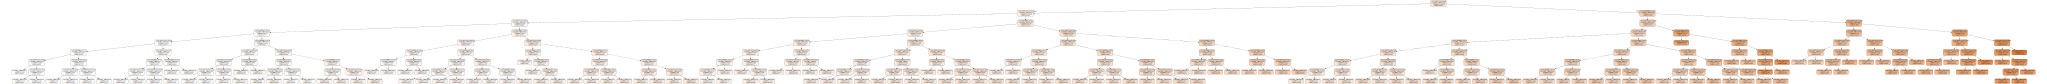

In [184]:
import graphviz
from sklearn.tree import export_graphviz
list_features = X_test.columns
data = export_graphviz(regressor.estimators_[0],out_file=None,feature_names=list_features,class_names=y_test,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

### Inverse transform random forest

In [185]:
df_new_enc_filt_v7 = df_new_enc_filt.copy() 

In [186]:
#hacemos el split del dataframe con label encoder pero no esta escalado
Y_rfr = df_new_enc_filt_v7['price_usd']
X_rfr = df_new_enc_filt_v7.drop(['price_usd'],axis=1)#para que solo queden las columnas year_produced y count_features

X_train , X_test, y_train, y_test = train_test_split(X_rfr,Y_rfr , test_size=0.2, random_state=10)

In [187]:
# como los y_train e y_test son series, los transformamos a dataframe para luego hacerle un standard scaler
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)

In [188]:
#hago el escalado a cada variable X e Y correspondiente (train y test)
X_train_scaled = scaler_std.fit_transform(X_train)
y_train_scaled = scaler_std.fit_transform(y_train_df[['price_usd']])#esto es para solucionar el error de "reshape(1)"
X_test_scaled = scaler_std.fit_transform(X_test)
y_test_scaled = scaler_std.fit_transform(y_test_df[['price_usd']])

In [189]:
#como el escalado transforma los datos en series, los volvemos a poner en su dataframe correspondiente
X_train=pd.DataFrame ( data = X_train_scaled, columns = X_train.columns)
X_test=pd.DataFrame ( data = X_test_scaled, columns = X_test.columns)
y_test=pd.DataFrame ( data = y_test_scaled, columns = y_test_df.columns)
y_train=pd.DataFrame ( data = y_train_scaled, columns = y_train_df.columns)

In [190]:
regressor = RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=6,
                      random_state=42)

In [191]:
# fit the regressor with x and y data
reg=regressor.fit(X_train, y_train) 

In [192]:
r2=reg.score(X_train,y_train)
print(f'Obtenemos el r2 del entrenamiento: {r2}')#0.9999993036607415

Obtenemos el r2 del entrenamiento: 0.7114456012030268


In [193]:
prediction = regressor.predict(X_test)  # test the output by changing values

In [194]:
print(f"r2 score: {sklearn.metrics.r2_score(y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(y_test,prediction)}")

r2 score: 0.6893647340923179
mean squared error: 0.31063526590768215
mean absolute error: 0.3388752980570776


In [195]:
#hacemos el inverse_Transform del y_test
inversed_test = scaler_std.inverse_transform(y_test)
inversed_test
#el inverse_Transform devuelve una serie

array([[  379.],
       [ 1300.],
       [ 3200.],
       ...,
       [10000.],
       [ 4500.],
       [ 1700.]])

In [196]:
#al prediction al ser un series, lo transformamos a dataframe para luego hacerle el inverse_transform
prediction_df=pd.DataFrame( data = prediction, columns = y_test.columns)

In [197]:
#hacemos el inverse_transform del prediction
inversed_prediction = scaler_std.inverse_transform(prediction_df)
inversed_prediction
#el inverse_Transform devuelve una serie

array([[ 1503.04941462],
       [ 2107.31536695],
       [ 3040.62035784],
       ...,
       [ 6850.94502397],
       [14957.78311649],
       [ 3305.14134956]])

In [198]:
p=pd.DataFrame(inversed_prediction,columns=['price_usd_predicted']).reset_index()  #convertimos a dataframe los arrays con las predicciones y valores de test ya con el inverse_transform
t=pd.DataFrame(inversed_test,columns=['price_usd']).reset_index()

df_cross=pd.concat([p, t], axis=1).round(1)

In [199]:
df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross[['price_usd','price_usd_predicted','diff']]

price_usd  price_usd_predicted     diff
0         379.0               1503.0   1124.0
1        1300.0               2107.3    807.3
2        3200.0               3040.6   -159.4
3        1350.0               2248.5    898.5
4       16900.0              14848.8  -2051.2
...         ...                  ...      ...
7163     9000.0              11839.2   2839.2
7164    13900.0              13734.0   -166.0
7165    10000.0               6850.9  -3149.1
7166     4500.0              14957.8  10457.8
7167     1700.0               3305.1   1605.1

[7168 rows x 3 columns]

##Modelo de regresion con XGBOOST, GBOOST Y LGBOOST, 

In [200]:
# Instalación LightGBM: pip install lightgbm
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instalación XGBoost: pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [201]:
#parametros globales para Xgboost, GBM,  LGBM
# parametros globales
num_estimators = [100, 200, 300, 50]
max_depth = [3, 4, 5, 8, 10]
learning_rate = np.arange (0.001, 1, 0.005)


#xgboost
booster = ['gbtree']

params_global = {'n_estimators': num_estimators,
                 'max_depth': max_depth, 
                 'learning_rate': learning_rate}

In [202]:
#seleccion de mejor algoritmo
results = {}

#loop por los algoritmos 
for model in [GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor()]:
  print(f'Start training {model.__class__.__name__}')

  #randomsear
  modeling = RandomizedSearchCV(model, params_global, cv=5, n_jobs=-1, refit=True,  verbose=1, n_iter=30)#scoring='neg_mean_absolute_error'

  #entrenamiento
  modeling.fit(X_train, y_train)

  #seleccion del modelo con refit 
  best_model = modeling.best_estimator_

  #metrica de test
  metrics_test = sklearn.metrics.r2_score(y_test, best_model.predict(X_test))#mean_absolute_error(y_test, best_model.predict(X_test))

  #save results
  results[best_model.__class__.__name__] = {'modelo': best_model,
                                            'score_train': modeling.best_score_,
                                            'score_test': metrics_test,
                                            'params': modeling.best_params_}
    
  


Start training GradientBoostingRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training XGBRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[14:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Start training LGBMRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [203]:
#check model performance

pd.DataFrame.from_dict(results, orient='index')

modelo  \
GradientBoostingRegressor  ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBRegressor               XGBRegressor(learning_rate=0.031, n_estimators...   
LGBMRegressor              LGBMRegressor(learning_rate=0.1760000000000000...   

                           score_train  score_test  \
GradientBoostingRegressor     0.705700    0.689946   
XGBRegressor                  0.705900    0.690636   
LGBMRegressor                 0.705563    0.691359   

                                                                      params  
GradientBoostingRegressor  {'n_estimators': 100, 'max_depth': 4, 'learnin...  
XGBRegressor               {'n_estimators': 300, 'max_depth': 3, 'learnin...  
LGBMRegressor              {'n_estimators': 50, 'max_depth': 4, 'learning...

##Modelo de Regresión con Random Forest con Random Search para todo el dataset

In [204]:
df_new_enc_full.drop(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'],axis= 1, inplace=True)
df_new_enc_full.head()



manufacturer_name  model_name  transmission  color  odometer_value  \
0                 45         691             0      8          190000   
1                 45         691             0      1          290000   
2                 45         448             0      7          402000   
3                 45         536             1      1           10000   
4                 45         592             0      0          280000   

   year_produced  engine_fuel  engine_has_gas  engine_type  engine_capacity  \
0           2010            3               0            2               19   
1           2002            3               0            2               24   
2           2001            3               0            2               19   
3           1999            3               0            2               24   
4           2001            3               0            2               19   

   ...  has_warranty  state  drivetrain  price_usd  is_exchangeable  \
0  ...             0      2           0    10900.0                0   
1  ...             0      2           0     5000.0                1   
2  ...             0      2           0     2800.0                1   
3  ...             0      2           0     9999.0                1   
4  ...             0      2           0     2134.0                1   

   location_region  number_of_photos  up_counter  duration_listed  \
0                3                 9          13               16   
1                3                12          54               83   
2                3                 4          72              151   
3                3                 9          42               86   
4                1                14           7                7   

   count_features  
0               7  
1               4  
2               3  
3               1  
4               4  

[5 rows x 21 columns]

In [205]:
df_new_enc_full.drop(['duration_listed','up_counter','number_of_photos'],axis= 1, inplace=True)
df_new_enc_full.head()


manufacturer_name  model_name  transmission  color  odometer_value  \
0                 45         691             0      8          190000   
1                 45         691             0      1          290000   
2                 45         448             0      7          402000   
3                 45         536             1      1           10000   
4                 45         592             0      0          280000   

   year_produced  engine_fuel  engine_has_gas  engine_type  engine_capacity  \
0           2010            3               0            2               19   
1           2002            3               0            2               24   
2           2001            3               0            2               19   
3           1999            3               0            2               24   
4           2001            3               0            2               19   

   body_type  has_warranty  state  drivetrain  price_usd  is_exchangeable  \
0         10             0      2           0    10900.0                0   
1         10             0      2           0     5000.0                1   
2          9             0      2           0     2800.0                1   
3          8             0      2           0     9999.0                1   
4         10             0      2           0     2134.0                1   

   location_region  count_features  
0                3               7  
1                3               4  
2                3               3  
3                3               1  
4                1               4

In [232]:
df_new_enc_full_vf = df_new_enc_full.copy()
df_new_enc_full_vf

manufacturer_name  model_name  transmission  color  odometer_value  \
0                     45         691             0      8          190000   
1                     45         691             0      1          290000   
2                     45         448             0      7          402000   
3                     45         536             1      1           10000   
4                     45         592             0      0          280000   
...                  ...         ...           ...    ...             ...   
37674                  8          47             0      8          290000   
37675                  8         693             1      1          321000   
37676                  8          47             0      1          777957   
37677                  8         693             1      0           20000   
37678                  8         984             0      8          297729   

       year_produced  engine_fuel  engine_has_gas  engine_type  \
0               2010            3               0            2   
1               2002            3               0            2   
2               2001            3               0            2   
3               1999            3               0            2   
4               2001            3               0            2   
...              ...          ...             ...          ...   
37674           2000            3               0            2   
37675           2004            0               0            0   
37676           2000            3               0            2   
37677           2001            3               0            2   
37678           2000            3               0            2   

       engine_capacity  body_type  has_warranty  state  drivetrain  price_usd  \
0                   19         10             0      2           0    10900.0   
1                   24         10             0      2           0     5000.0   
2                   19          9             0      2           0     2800.0   
3                   24          8             0      2           0     9999.0   
4                   19         10             0      2           0     2134.0   
...                ...        ...           ...    ...         ...        ...   
37674               29          8             0      2           1     2750.0   
37675               16          2             0      2           1     4800.0   
37676               29          8             0      2           1     4300.0   
37677               14          6             0      2           1     4000.0   
37678               18          6             0      2           1     3200.0   

       is_exchangeable  location_region  count_features  
0                    0                3               7  
1                    1                3               4  
2                    1                3               3  
3                    1                3               1  
4                    1                1               4  
...                ...              ...             ...  
37674                1                3               5  
37675                1                0               5  
37676                0                3               5  
37677                1                0               2  
37678                1                3               1  

[35836 rows x 18 columns]

In [233]:
#hacemos el split del dataframe con label encoder pero no esta escalado
Y_rfr = df_new_enc_full_vf['price_usd']
X_rfr = df_new_enc_full_vf.drop(['price_usd'],axis=1)

X_train , X_test, y_train, y_test = train_test_split(X_rfr,Y_rfr , test_size=0.2, random_state=42)

In [234]:
# como los y_train e y_test son series, los transformamos a dataframe para luego hacerle un standard scaler
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)

In [235]:
#hago el escalado a cada variable X e Y correspondiente (train y test)
X_train_scaled = scaler_std.fit_transform(X_train)
y_train_scaled = scaler_std.fit_transform(y_train_df[['price_usd']])#esto es para solucionar el error de "reshape(1)"
X_test_scaled = scaler_std.fit_transform(X_test)
y_test_scaled = scaler_std.fit_transform(y_test_df[['price_usd']])

In [236]:
#como el escalado transforma los datos en series, los volvemos a poner en su dataframe correspondiente
X_train=pd.DataFrame ( data = X_train_scaled, columns = X_train.columns)
X_test=pd.DataFrame ( data = X_test_scaled, columns = X_test.columns)
y_test=pd.DataFrame ( data = y_test_scaled, columns = y_test_df.columns)
y_train=pd.DataFrame ( data = y_train_scaled, columns = y_train_df.columns)

In [211]:
from sklearn.model_selection import GridSearchCV


In [237]:
#seleccipon del clasificador
rfc=RandomForestRegressor(random_state=42)

#selección de hiperparámetros
param_grid = {
    'max_depth': [3,4,5,8,10],#80, 90, 100, 110
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 8, 10],  #se recomienda como máximo 6
    'n_estimators': [100, 200, 300, 50],
    'max_features': [6,12,18]
}

In [238]:
#seleccion del clasificador general
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv= 5, refit=True)

#entrenamiento 
CV_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [3, 4, 5, 8, 10],
                                        'max_features': [6, 12, 18],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [6, 8, 10],
                                        'n_estimators': [100, 200, 300, 50]})

In [239]:
#dataframe con toda la infor de cada corrida de entrenamiento
results = pd.DataFrame(CV_rfc.cv_results_)

#info del mejor modelo
CV_rfc.best_estimator_

RandomForestRegressor(max_depth=10, max_features=12, min_samples_leaf=3,
                      min_samples_split=6, n_estimators=200, random_state=42)

In [252]:
CV_rfc.best_score_

0.8980844946548947

In [253]:
pd.DataFrame(CV_rfc.cv_results_).sort_values('rank_test_score', ascending=True).head(-5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.717583      1.419062         0.160229        0.001316   
8       6.654289      0.200958         0.226047        0.001699   
3       2.188685      0.006528         0.082358        0.005027   
1       2.114830      0.290172         0.071658        0.010880   
2       3.375338      0.716875         0.103708        0.020502   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                200                       6                      3   
8                300                      10                      5   
3                100                      10                      5   
1                100                       6                      5   
2                200                      10                      4   

  param_max_features param_max_depth  \
0                 12              10   
8                  6              10   
3                  6              10   
1                  6               8   
2                  6               5   

                                              params  split0_test_score  \
0  {'n_estimators': 200, 'min_samples_split': 6, ...           0.900902   
8  {'n_estimators': 300, 'min_samples_split': 10,...           0.891598   
3  {'n_estimators': 100, 'min_samples_split': 10,...           0.892345   
1  {'n_estimators': 100, 'min_samples_split': 6, ...           0.873952   
2  {'n_estimators': 200, 'min_samples_split': 10,...           0.820036   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.901810           0.898753           0.899836           0.889121   
8           0.892449           0.891986           0.890673           0.882233   
3           0.892179           0.891536           0.889978           0.881836   
1           0.873062           0.874335           0.874661           0.866352   
2           0.815988           0.813730           0.816555           0.808705   

   mean_test_score  std_test_score  rank_test_score  
0         0.898084        0.004597                1  
8         0.889788        0.003822                2  
3         0.889575        0.003959                3  
1         0.872473        0.003107                4  
2         0.815003        0.003741                5

In [247]:
regressor = RandomForestRegressor(max_depth=10, max_features=12, min_samples_leaf=3,
                      min_samples_split=6, n_estimators=200, random_state=42)

In [248]:
# fit the regressor with x and y data
reg=regressor.fit(X_train, y_train) 

In [249]:
r2=reg.score(X_train,y_train)
print(f'Obtenemos el r2 del entrenamiento: {r2}')

Obtenemos el r2 del entrenamiento: 0.9323349568238699


In [250]:
prediction = regressor.predict(X_test)  # test the output by changing values

In [251]:
print(f"r2 score: {sklearn.metrics.r2_score(y_test,prediction)}")
print(f"mean squared error: {mean_squared_error(y_test,prediction)}")
print(f"mean absolute error: {mean_absolute_error(y_test,prediction)}")

r2 score: 0.8808140537208635
mean squared error: 0.11918594627913641
mean absolute error: 0.20607758564177084


In [222]:
#hacemos el inverse_Transform del y_test
inversed_test = scaler_std.inverse_transform(y_test)
inversed_test
#el inverse_Transform devuelve una serie

array([[2950.],
       [6300.],
       [8000.],
       ...,
       [1900.],
       [5500.],
       [2350.]])

In [223]:
#al prediction al ser un series, lo transformamos a dataframe para luego hacerle el inverse_transform
prediction_df=pd.DataFrame( data = prediction, columns = y_test.columns)

In [224]:
#hacemos el inverse_transform del prediction
inversed_prediction = scaler_std.inverse_transform(prediction_df)
inversed_prediction
#el inverse_Transform devuelve una serie

array([[1601.12490193],
       [7052.49516412],
       [8702.26573858],
       ...,
       [2344.46846872],
       [7455.23267613],
       [3553.95104887]])

In [225]:
p=pd.DataFrame(inversed_prediction,columns=['price_usd_predicted']).reset_index()  #convertimos a dataframe los arrays con las predicciones y valores de test ya con el inverse_transform
t=pd.DataFrame(inversed_test,columns=['price_usd']).reset_index()

df_cross=pd.concat([p, t], axis=1).round(1)

In [226]:
df_cross['diff']=df_cross['price_usd_predicted']-df_cross['price_usd']
df_cross[['price_usd','price_usd_predicted','diff']]

price_usd  price_usd_predicted    diff
0        2950.0               1601.1 -1348.9
1        6300.0               7052.5   752.5
2        8000.0               8702.3   702.3
3       13200.0              11107.5 -2092.5
4        3500.0               4228.8   728.8
...         ...                  ...     ...
7163     2800.0               2504.2  -295.8
7164     2950.0               4637.2  1687.2
7165     1900.0               2344.5   444.5
7166     5500.0               7455.2  1955.2
7167     2350.0               3554.0  1204.0

[7168 rows x 3 columns]

##Modelo de regresion con XGBOOST, GBOOST Y LGBOOST para todo el dataset

In [227]:
# Instalación LightGBM: pip install lightgbm
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instalación XGBoost: pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [254]:
#parametros globales para Xgboost, GBM,  LGBM
# parametros globales
num_estimators = [100, 200, 300, 50]
max_depth = [3, 4, 5, 8, 10]
learning_rate = np.arange (0.001, 1, 0.005)


#xgboost
booster = ['gbtree']

params_global = {'n_estimators': num_estimators,
                 'max_depth': max_depth, 
                 'learning_rate': learning_rate}

In [255]:
#seleccion de mejor algoritmo
results = {}

#loop por los algoritmos 
for model in [GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor()]:
  print(f'Start training {model.__class__.__name__}')

  #randomsear
  modeling = RandomizedSearchCV(model, params_global, cv=5, n_jobs=-1, refit=True,  verbose=1, n_iter=30,random_state=42)#scoring='neg_mean_absolute_error'

  #entrenamiento
  modeling.fit(X_train, y_train)

  #seleccion del modelo con refit 
  best_model = modeling.best_estimator_

  #metrica de test
  metrics_test = sklearn.metrics.r2_score(y_test, best_model.predict(X_test))#mean_absolute_error(y_test, best_model.predict(X_test))

  #save results
  results[best_model.__class__.__name__] = {'modelo': best_model,
                                            'score_train': modeling.best_score_,
                                            'score_test': metrics_test,
                                            'params': modeling.best_params_}
    
  


Start training GradientBoostingRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training XGBRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[16:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Start training LGBMRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [256]:
#check model performance

pd.DataFrame.from_dict(results, orient='index')

modelo  \
GradientBoostingRegressor  ([DecisionTreeRegressor(criterion='friedman_ms...   
XGBRegressor               XGBRegressor(learning_rate=0.281, max_depth=5,...   
LGBMRegressor              LGBMRegressor(learning_rate=0.281, max_depth=5...   

                           score_train  score_test  \
GradientBoostingRegressor     0.929539    0.909062   
XGBRegressor                  0.930614    0.904122   
LGBMRegressor                 0.929305    0.914629   

                                                                      params  
GradientBoostingRegressor  {'n_estimators': 200, 'max_depth': 5, 'learnin...  
XGBRegressor               {'n_estimators': 300, 'max_depth': 5, 'learnin...  
LGBMRegressor              {'n_estimators': 300, 'max_depth': 5, 'learnin...

Al correr los modelos de boosting aplicando busqueda de hiperparametros a todo el dataset, encontramos que el mejor modelo es el LGBM Regressor.

Este ultimo tiene el mejor score_test pero en cuanto al score_train el mejor es el GradientBoosting Regressor.

#Conclusion final

El objetivo de nuestro trabajo consiste en encontrar el mejor modelo de predicción del precio de autos usados en Bielorrusia, para lo cual decidimos utilizar algoritmos de regresión.

A través del análisis EDA, observamos que las variables "year_produced" y "count_features" (ésta última variable fue creada por nosotros para contar el total de features disponibles en cada auto) muestran una fuerte correlación con la variable target. Adicionalmente, encontramos que en el dataset inicial existían ciertos valores atípicos en el precio de venta de los autos producidos previo al año 1990, los cuales decidimos excluir de nuestros modelos.

Inicialmente, realizamos una regresión lineal simple, utilizando únicamente las variables  year_produced y count_features, y luego utilizamos una regresión lineal múltiple con ambas variables. Ambos modelos arrojaron un score muy bajo y un alto error de bias, para lo cual decidimos normalizar nuestras variables aplicando logaritmo, pero no obtuvimos mejoras. Utilizando el mismo modelo de regresión lineal múltiple, probamos distintos modelos de normalización y como resultado encontramos que el standard scaler es la mejor normalización para nuestro modelo.

Para continuar optimizando nuestra predicción, decidimos probar un modelo de random forest con standard scaler, el cual mostró una importante mejoría respecto a los modelos de regresión lineal y múltiple. Inicialmente, utilizamos parámetros standard que posteriormente refinamos a través de la búsqueda de hiperparámetros.

Como último paso, creamos tres modelos de boosting los cuales arrojaron mejores predicciones respecto al random forest. El modelo ganador fue el LGBM Regressor.

A modo de aclaración, es importante señalar que al inicio utilizamos un dataset restringido, el cual incluía aquellas variables con una correlación mayor a 0.6 con la variable target price_usd. Pero, al notar que los resultados del score no subían más de 75% decidimos utilizar el dataset entero.
